In [1]:
%load_ext autoreload
%autoreload 2

# IMPORTS

In [2]:
import os
from dotenv import load_dotenv

# data
import numpy as np
import pandas as pd

# eda
import missingno as msng
import sweetviz as sv

from src.general.io import from_pickle
from src.visualization.plotting import plot_moments_histogram

# PATHS & NAMES

In [41]:
load_dotenv()

RAW_DATA_PATHS = {}
for short_name, filename in zip(["feb", "mar", "apr", "may", "feedback"],
                                ["event_stg_user_input_web_cw6.txt",
                                "event_stg_user_input_web_cw10.txt",
                                "event_stg_user_input_web_cw15.txt",
                                "event_stg_user_input_web_cw19.txt",
                                "current_user_feedback_text.xlsx"]):
    RAW_DATA_PATHS[short_name] = f"..{os.getenv('RAW_DATA_DIR')}/{filename}"


EXT_DATA_PATHS = {}
for short_name, filename in zip(["rasa"],
                                ["rasa_train_data.pkl"]):
    EXT_DATA_PATHS[short_name] = f"..{os.getenv('EXTERNAL_DATA_DIR')}/{filename}"


INTERIM_DATA_PATHS = {}
for short_name, filename in zip(["rasa_docs", "rasa_emb", "feedback"],
                                ["rasa_docs.pkl",
                                "rasa_embedings.pkl",
                                "feedback_docs.pkl",
                                ]):
    INTERIM_DATA_PATHS[short_name] = f"..{os.getenv('INTERIM_DATA_DIR')}/{filename}"


EDA_REPORT_PATHS = {}
for short_name in RAW_DATA_PATHS.keys():
    EDA_REPORT_PATHS[short_name] = f"..{os.getenv('REPORT_DIR')}/eda_{short_name}.html"

# DATA

In [27]:
feedback = pd.read_excel(RAW_DATA_PATHS["feedback"])
feedback.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   session_id               443 non-null    object        
 1   created_dt               443 non-null    datetime64[ns]
 2   channel                  443 non-null    object        
 3   feedback_text_list       443 non-null    object        
 4   feedback_text_count      443 non-null    int64         
 5   session_kpi_eva          443 non-null    object        
 6   dialog_engine            443 non-null    object        
 7   customer_segment         443 non-null    object        
 8   issues_count_total       443 non-null    int64         
 9   count_business_relevant  443 non-null    int64         
 10  topic_list               443 non-null    object        
 11  topic_count              443 non-null    int64         
 12  issus_name_br_list       442 non-nul

In [40]:
feb = pd.read_csv(RAW_DATA_PATHS["feb"], sep='|')
feb.info()

C:\Users\babenyshevs\AppData\Local\Temp\ipykernel_28300\3824480194.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  feb = pd.read_csv(RAW_DATA_PATHS["feb"], sep='|')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75632 entries, 0 to 75631
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   session_id                75632 non-null  object 
 1   event_id                  75632 non-null  object 
 2   created_ux                75632 non-null  float64
 3   created_dt                75632 non-null  object 
 4   user_input                75632 non-null  object 
 5   channel                   75632 non-null  object 
 6   top_intent_1              75630 non-null  object 
 7   top_intent_2              74914 non-null  object 
 8   top_intent_3              74914 non-null  object 
 9   top_intent_4              74914 non-null  object 
 10  top_intent_5              74914 non-null  object 
 11  issuer                    75632 non-null  object 
 12  content_version           75632 non-null  object 
 13  command                   75632 non-null  object 
 14  input_

In [47]:
mar = pd.read_csv(RAW_DATA_PATHS["mar"], sep='|')
mar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92857 entries, 0 to 92856
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   session_id                92857 non-null  object 
 1   event_id                  92857 non-null  object 
 2   created_ux                92857 non-null  float64
 3   created_dt                92857 non-null  object 
 4   user_input                92857 non-null  object 
 5   channel                   92857 non-null  object 
 6   top_intent_1              92852 non-null  object 
 7   top_intent_2              86790 non-null  object 
 8   top_intent_3              86790 non-null  object 
 9   top_intent_4              86790 non-null  object 
 10  top_intent_5              86790 non-null  object 
 11  issuer                    92857 non-null  object 
 12  content_version           92857 non-null  object 
 13  command                   92857 non-null  object 
 14  input_

In [29]:
apr = pd.read_csv(RAW_DATA_PATHS["apr"], sep='|')
apr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67584 entries, 0 to 67583
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   session_id                67584 non-null  object 
 1   event_id                  67584 non-null  object 
 2   created_ux                67584 non-null  float64
 3   created_dt                67584 non-null  object 
 4   user_input                67584 non-null  object 
 5   channel                   67584 non-null  object 
 6   top_intent_1              67486 non-null  object 
 7   top_intent_2              60873 non-null  object 
 8   top_intent_3              60873 non-null  object 
 9   top_intent_4              60873 non-null  object 
 10  top_intent_5              60873 non-null  object 
 11  issuer                    67584 non-null  object 
 12  content_version           67584 non-null  object 
 13  command                   67584 non-null  object 
 14  input_

In [33]:
may = pd.read_csv(RAW_DATA_PATHS["may"], sep='|')
may.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55934 entries, 0 to 55933
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   session_id                55934 non-null  object 
 1   event_id                  55934 non-null  object 
 2   created_ux                55934 non-null  float64
 3   created_dt                55934 non-null  object 
 4   user_input                55934 non-null  object 
 5   channel                   55934 non-null  object 
 6   top_intent_1              55862 non-null  object 
 7   top_intent_2              51061 non-null  object 
 8   top_intent_3              51061 non-null  object 
 9   top_intent_4              51061 non-null  object 
 10  top_intent_5              51061 non-null  object 
 11  issuer                    55934 non-null  object 
 12  content_version           55934 non-null  object 
 13  command                   55934 non-null  object 
 14  input_

In [46]:
rasa_emb = from_pickle(INTERIM_DATA_PATHS["rasa_emb"])

# MISSINGS

<Axes: >

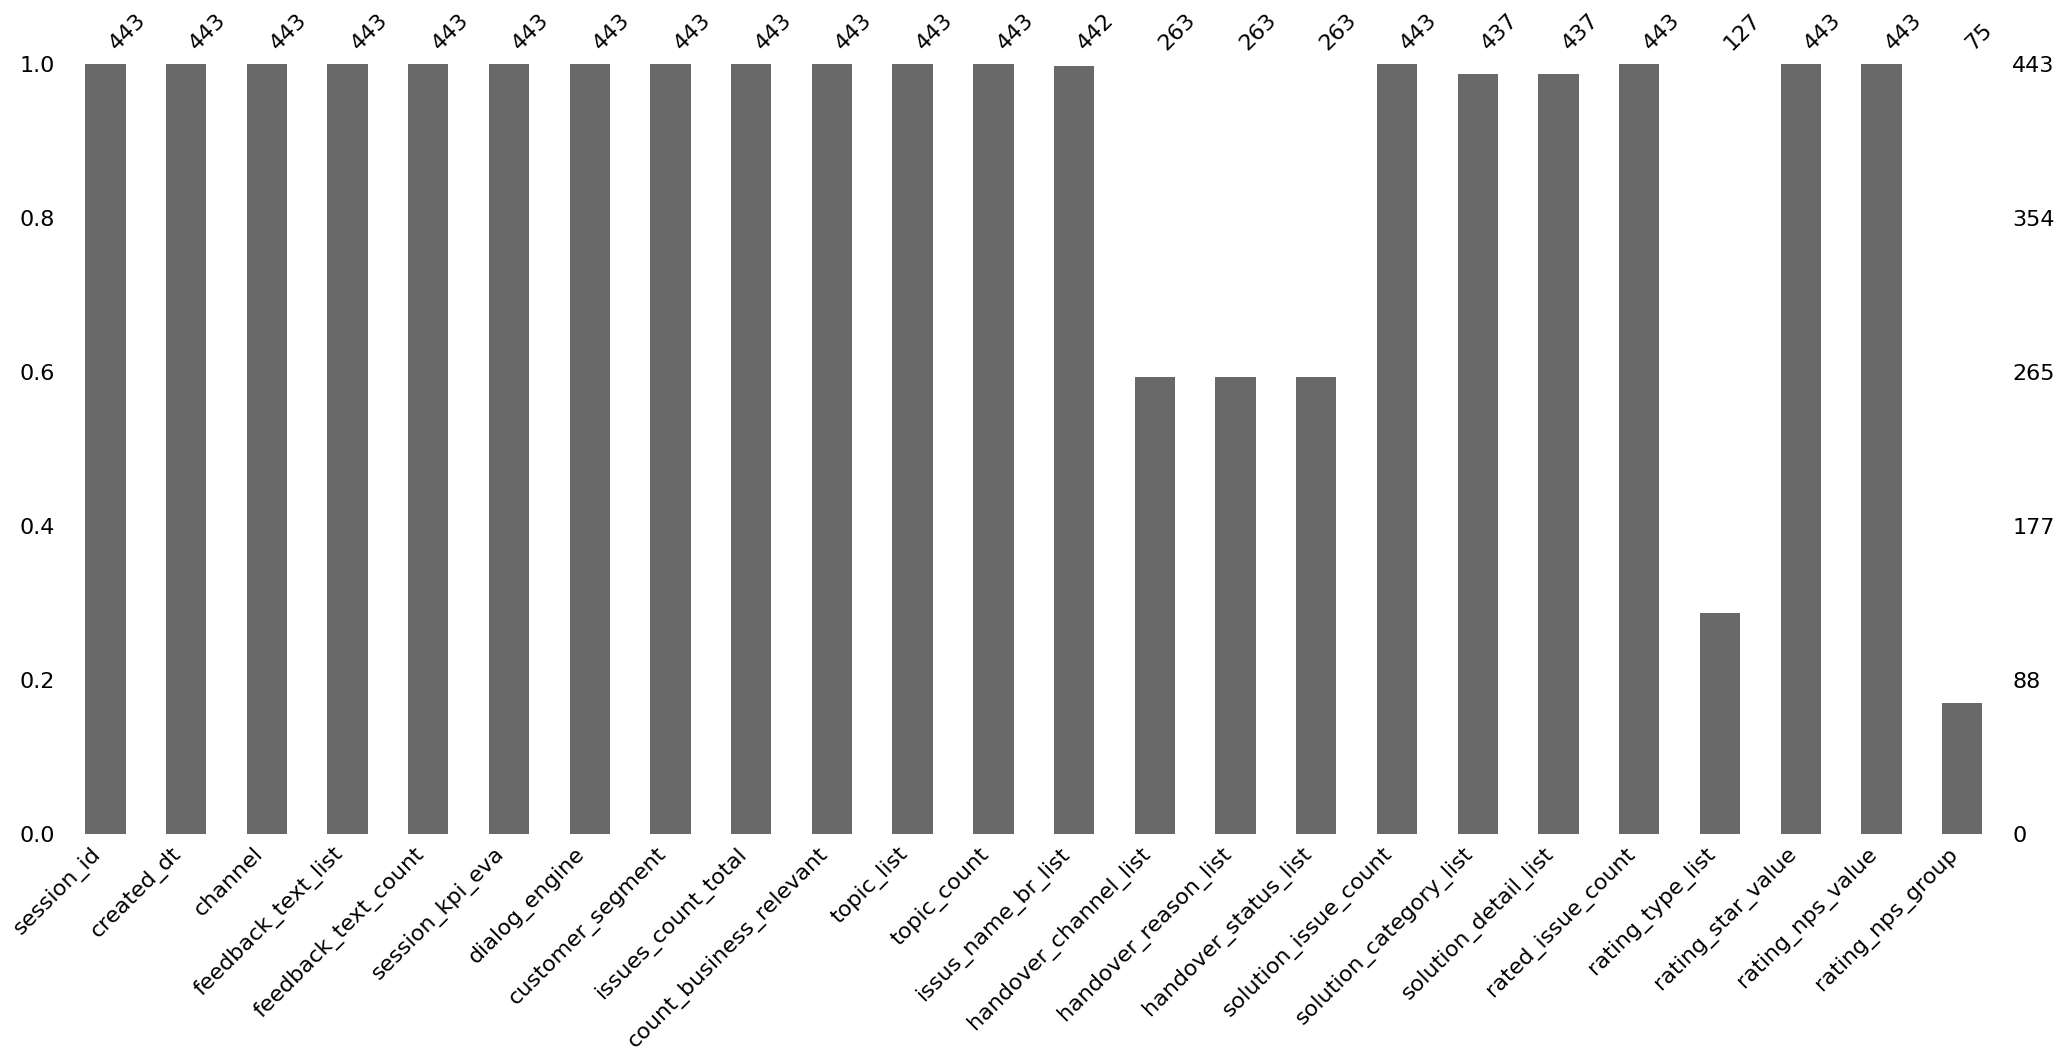

In [15]:
msng.bar(feedback)

<Axes: >

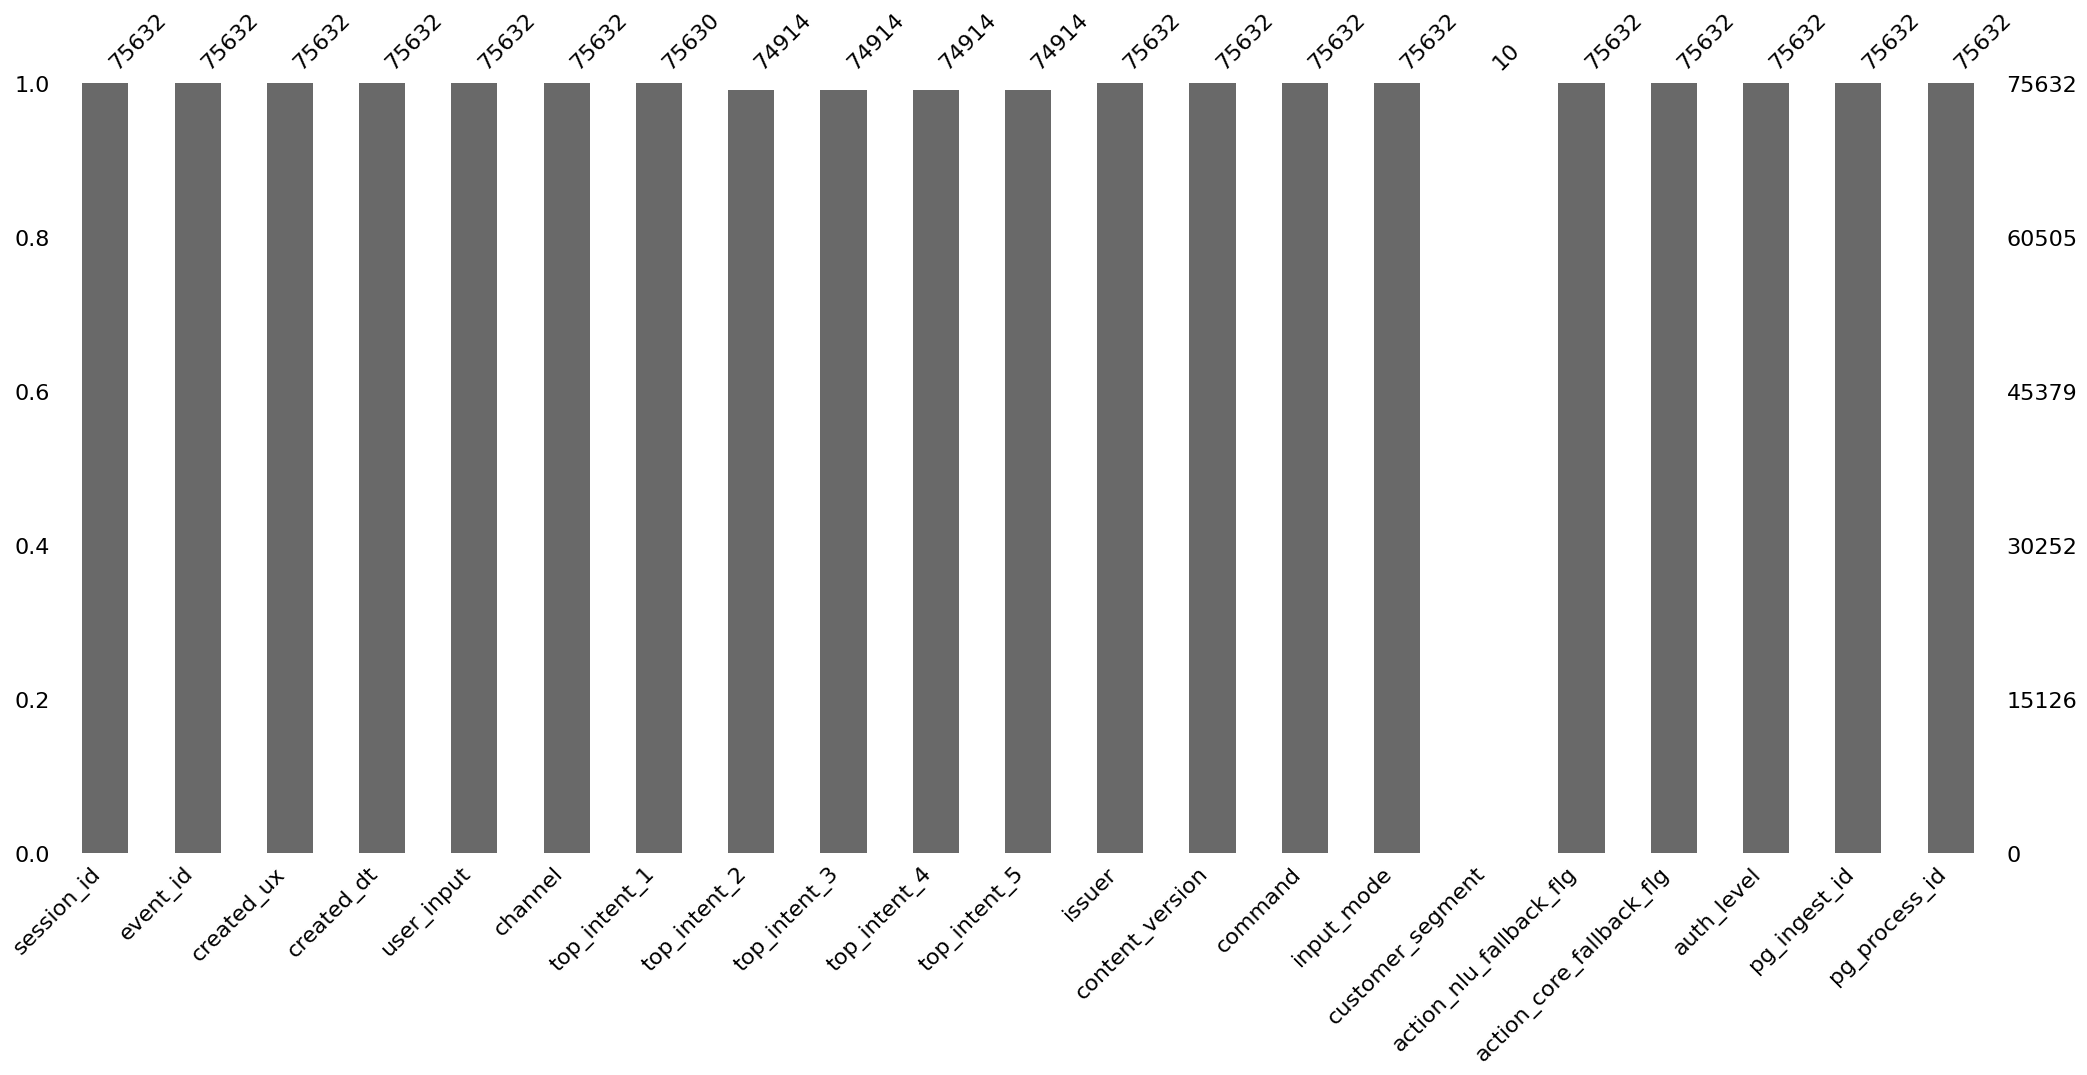

In [16]:
msng.bar(feb)

<Axes: >

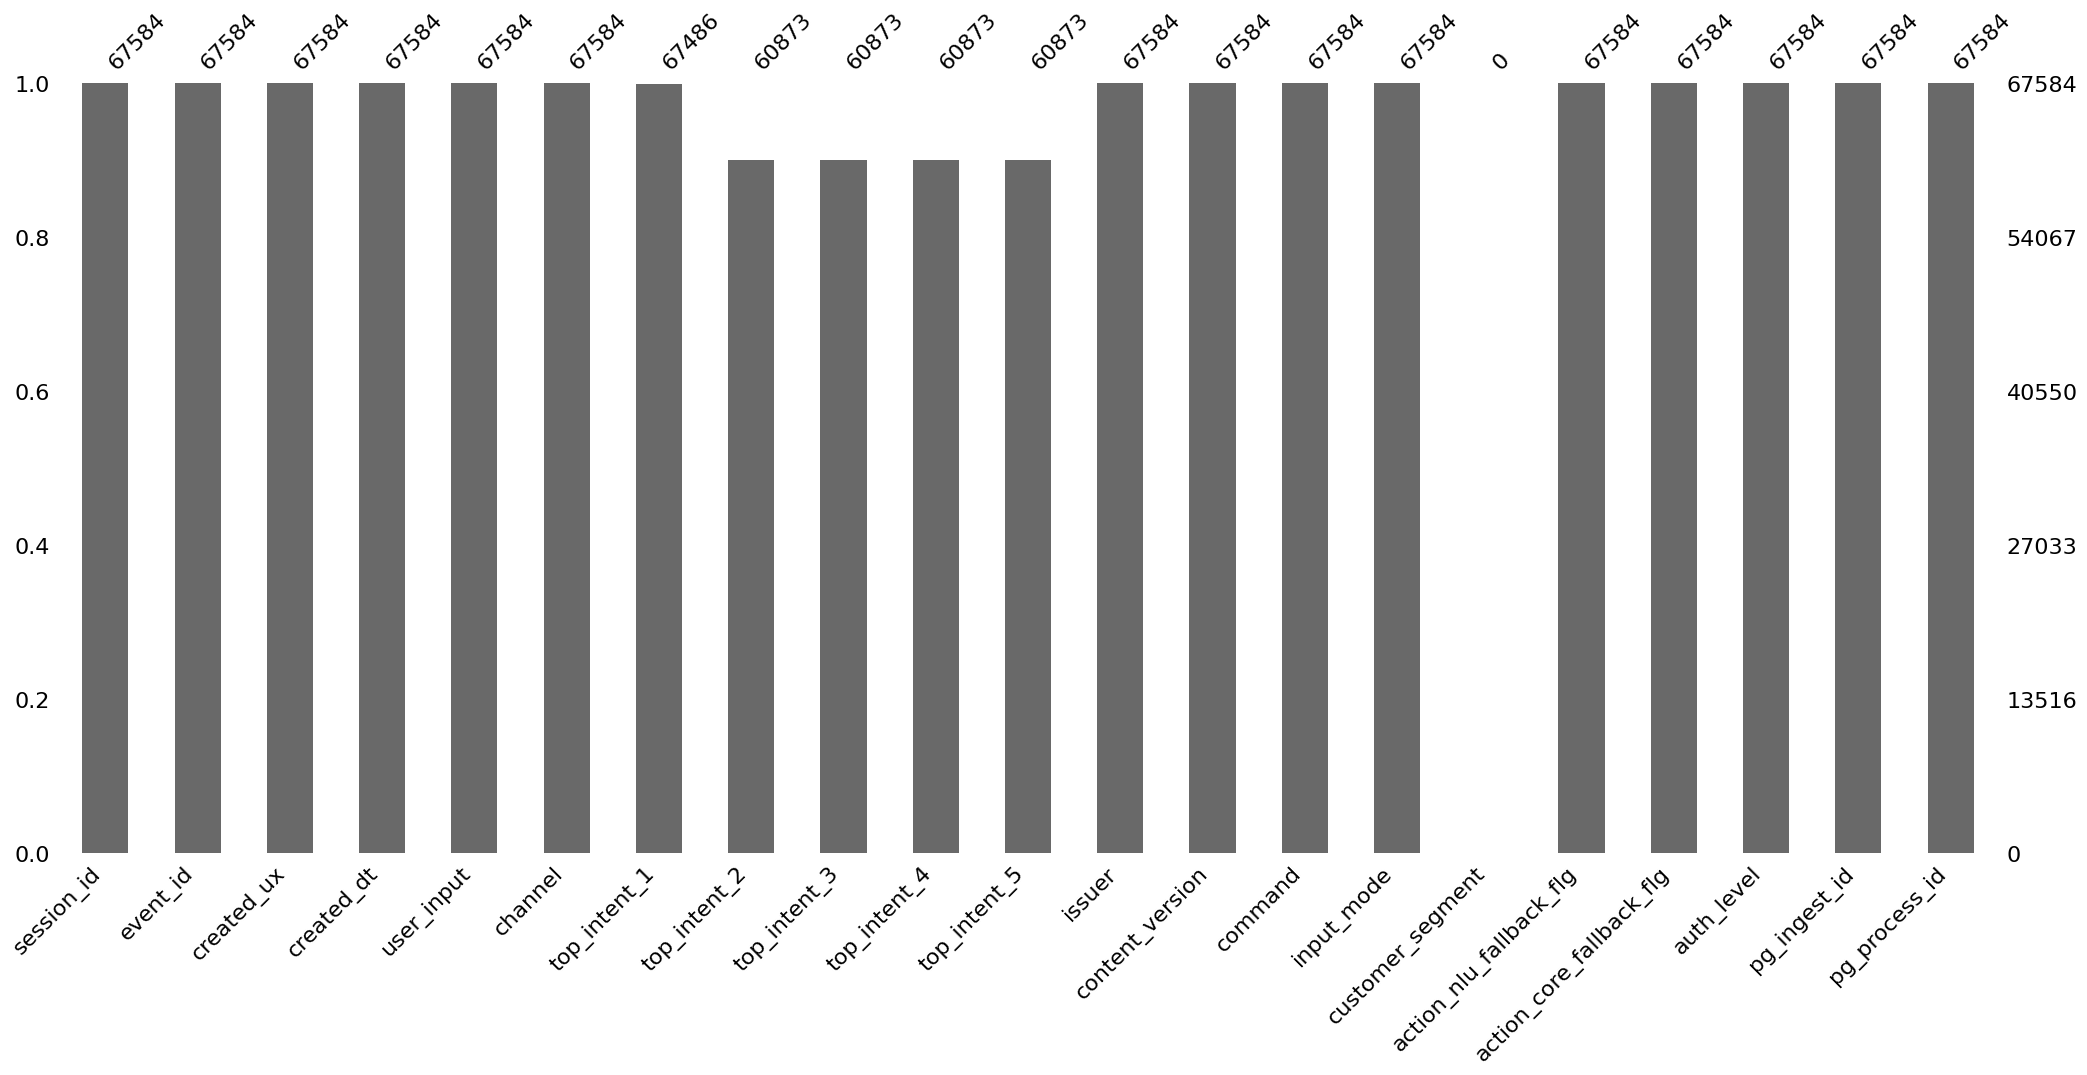

In [17]:
msng.bar(apr)

<Axes: >

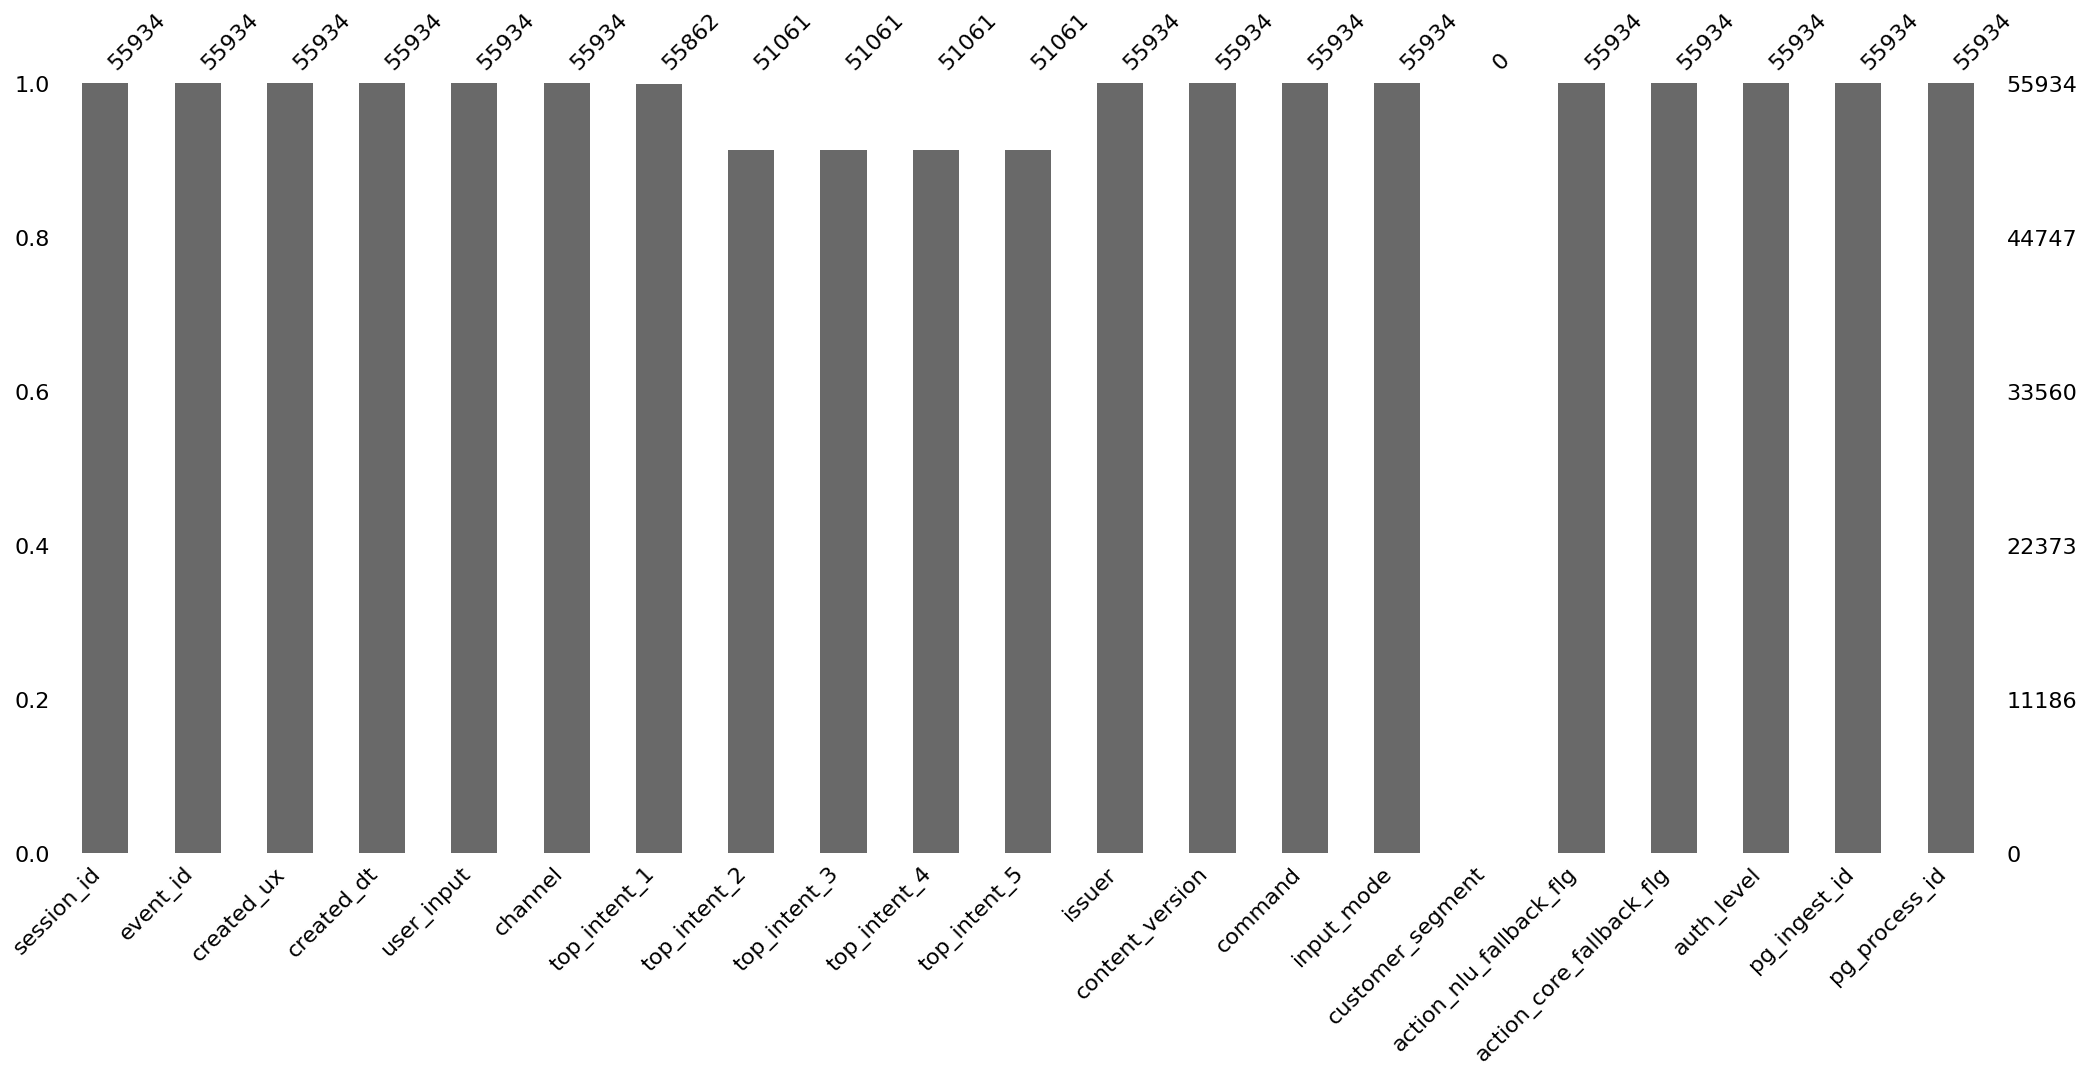

In [18]:
msng.bar(may)

# EDA

## feedback data

In [42]:
df = feedback.fillna("NA")
report = sv.analyze(df)
report.show_html(EDA_REPORT_PATHS["feedback"], open_browser=False)

                                             |          | [  0%]   00:00 -> (? left)

Report ../reports/eda_feedback.html was generated.


In [38]:
report.show_notebook()

## user input data

In [43]:
report = sv.analyze(feb.fillna("NA"))
report.show_html(EDA_REPORT_PATHS["feb"], open_browser=False)

                                             |          | [  0%]   00:00 -> (? left)

Report ../reports/eda_feb.html was generated.



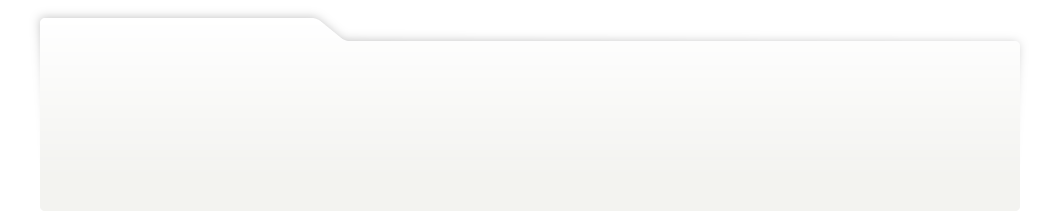
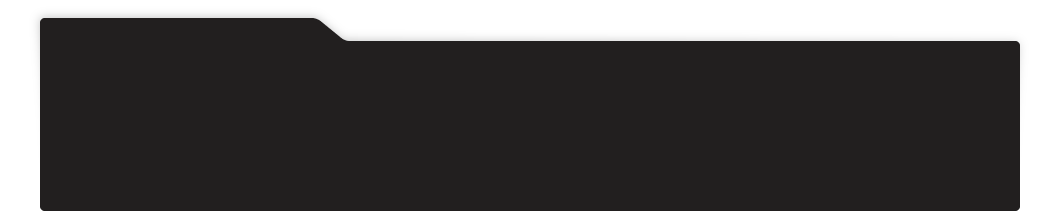
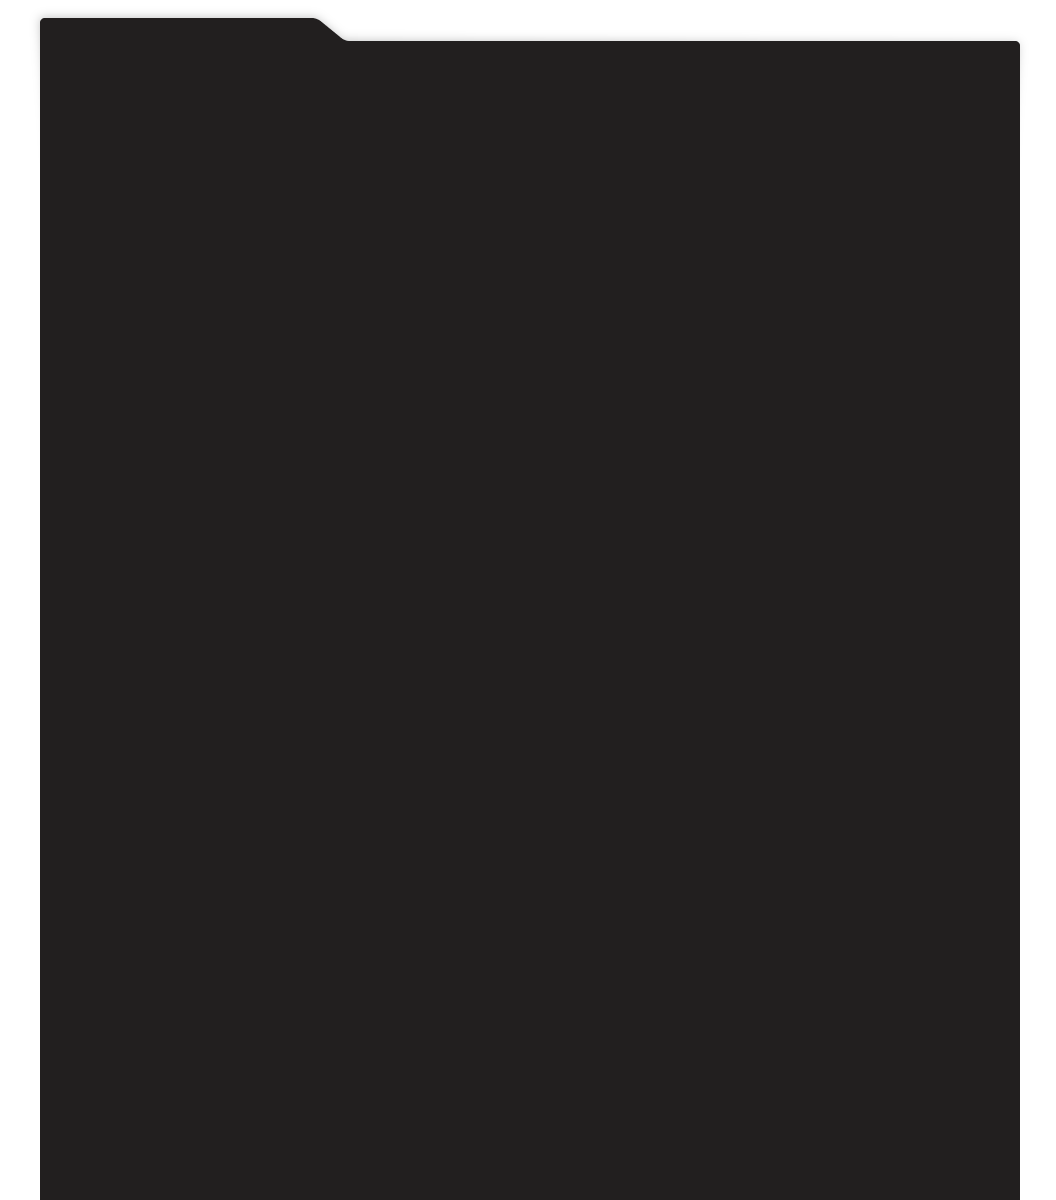
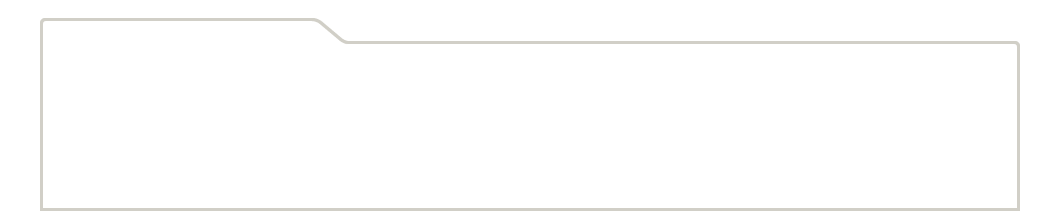
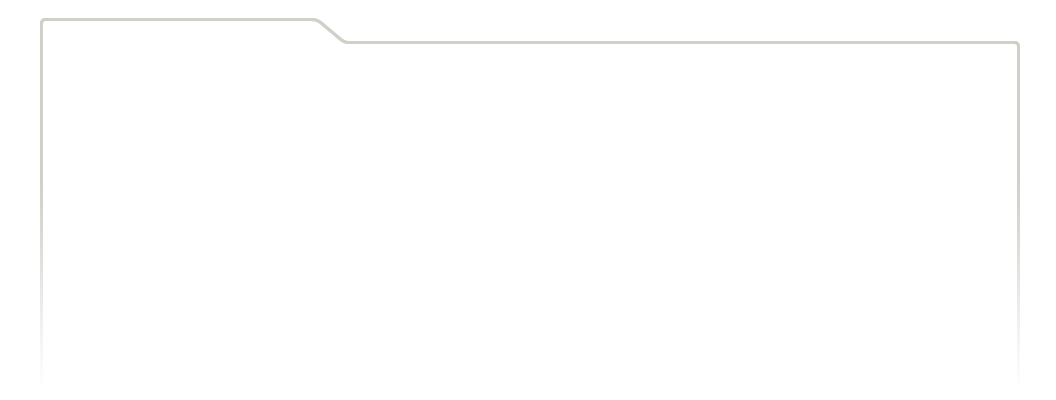
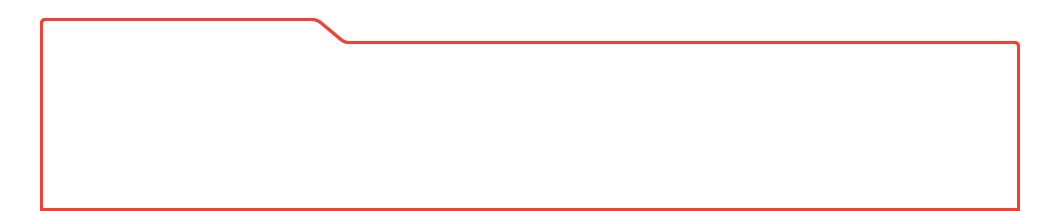
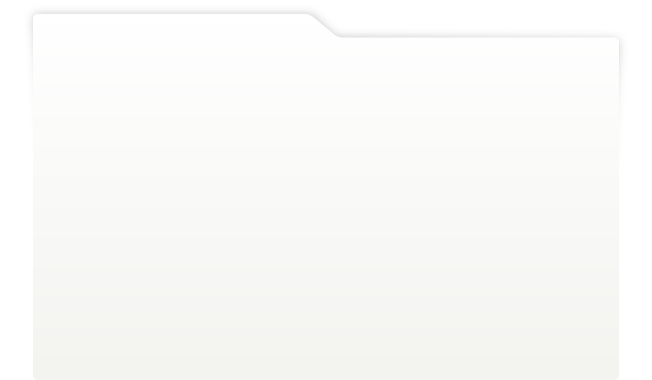
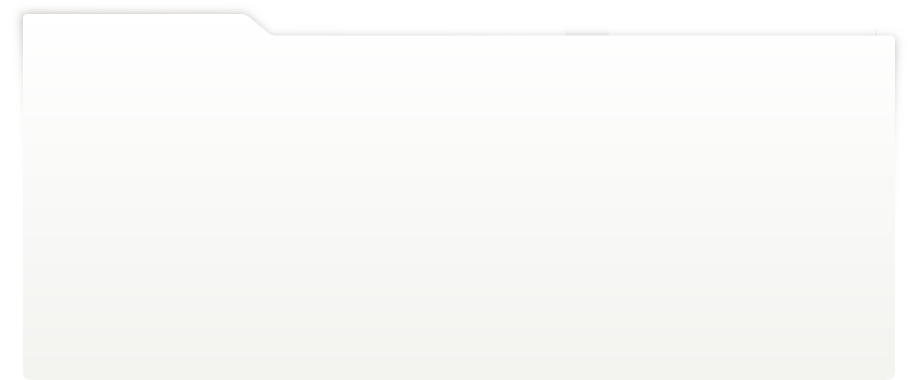
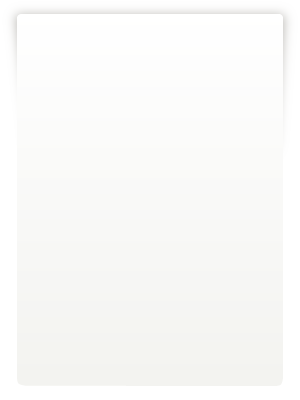
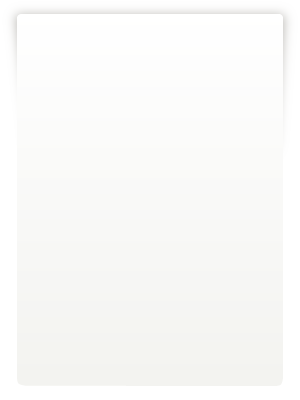
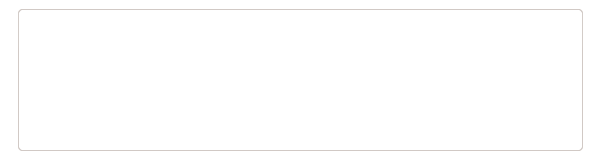
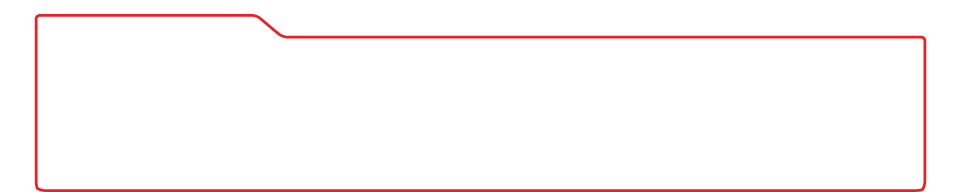
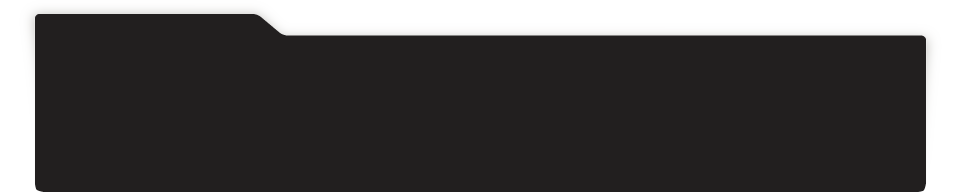
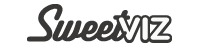
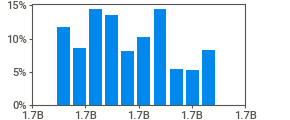
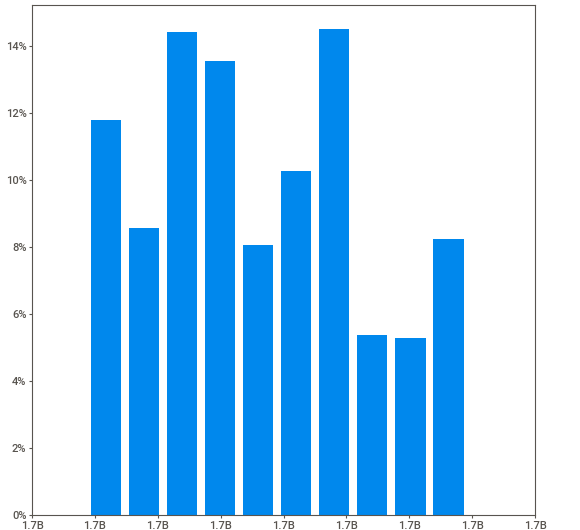
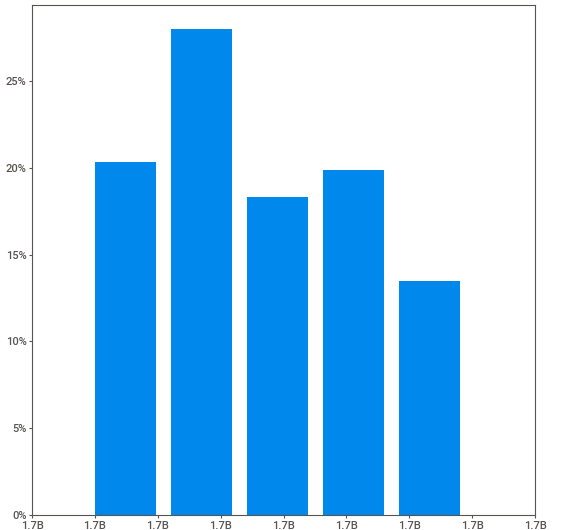
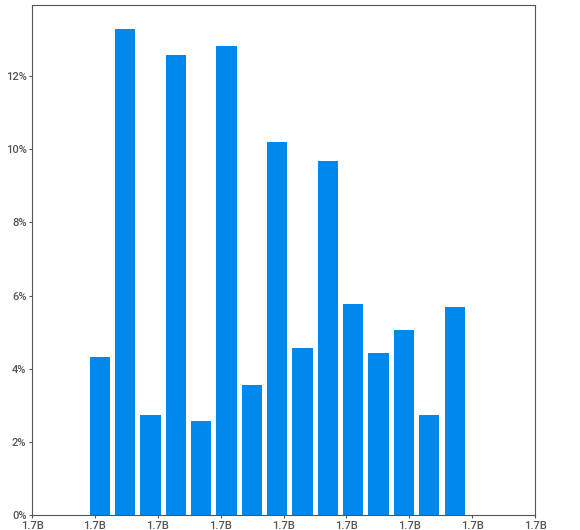
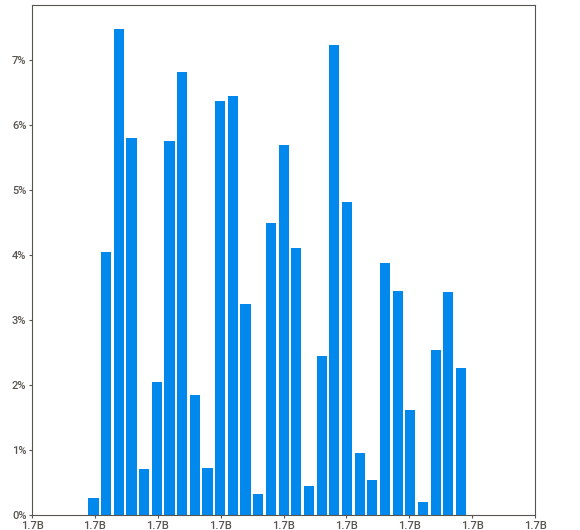
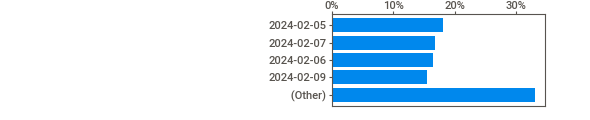
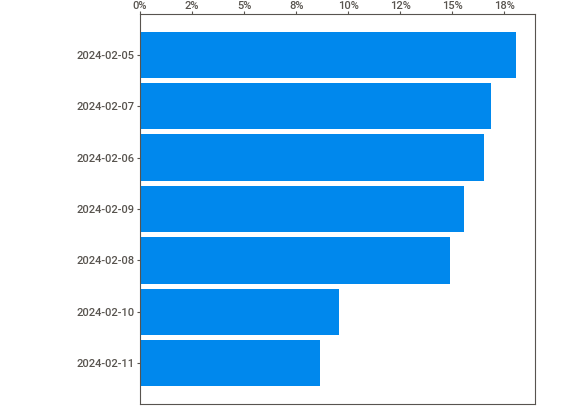
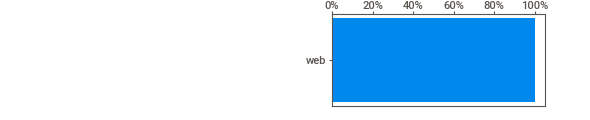
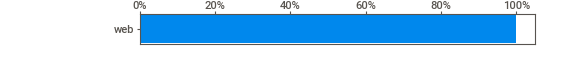
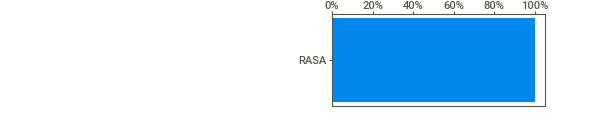
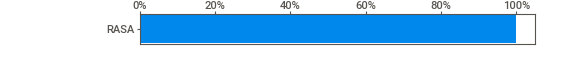
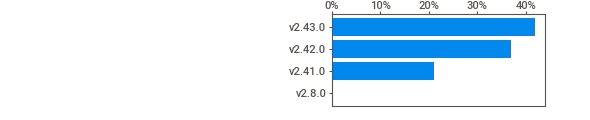
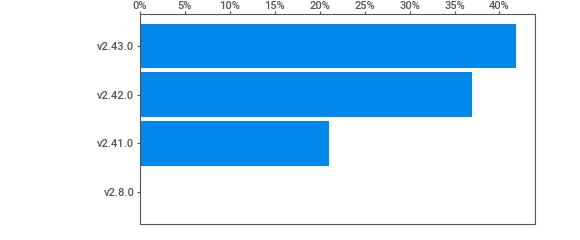
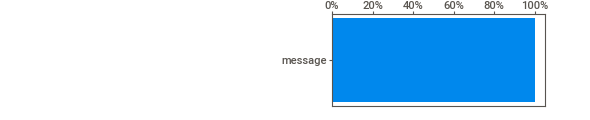
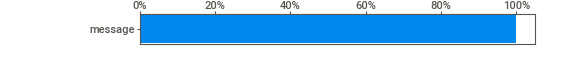
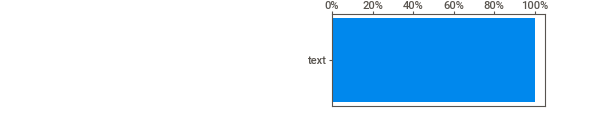
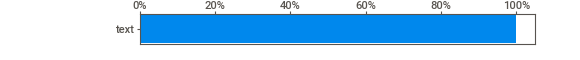
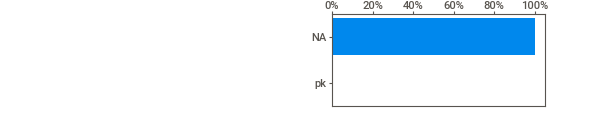
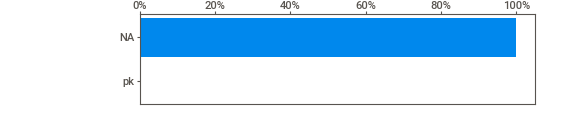
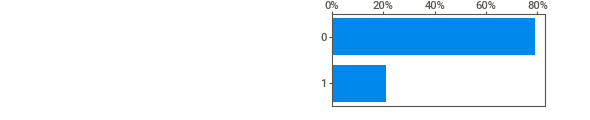
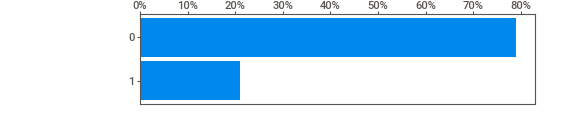
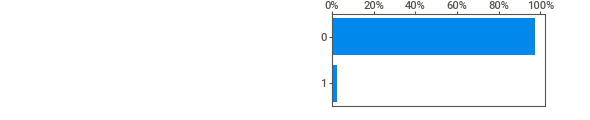
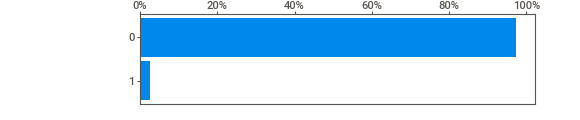
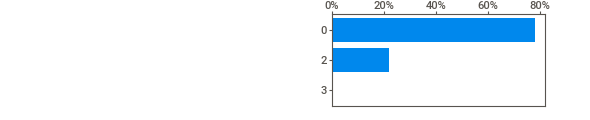
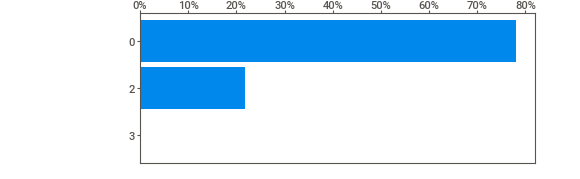
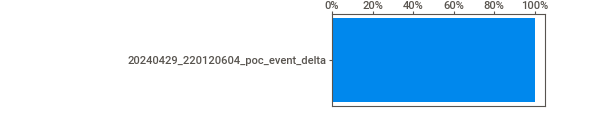
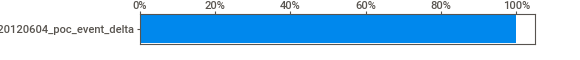
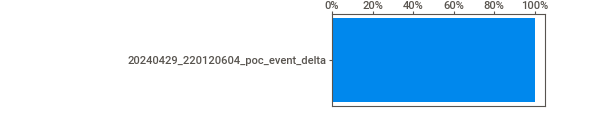
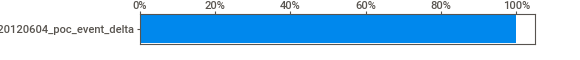
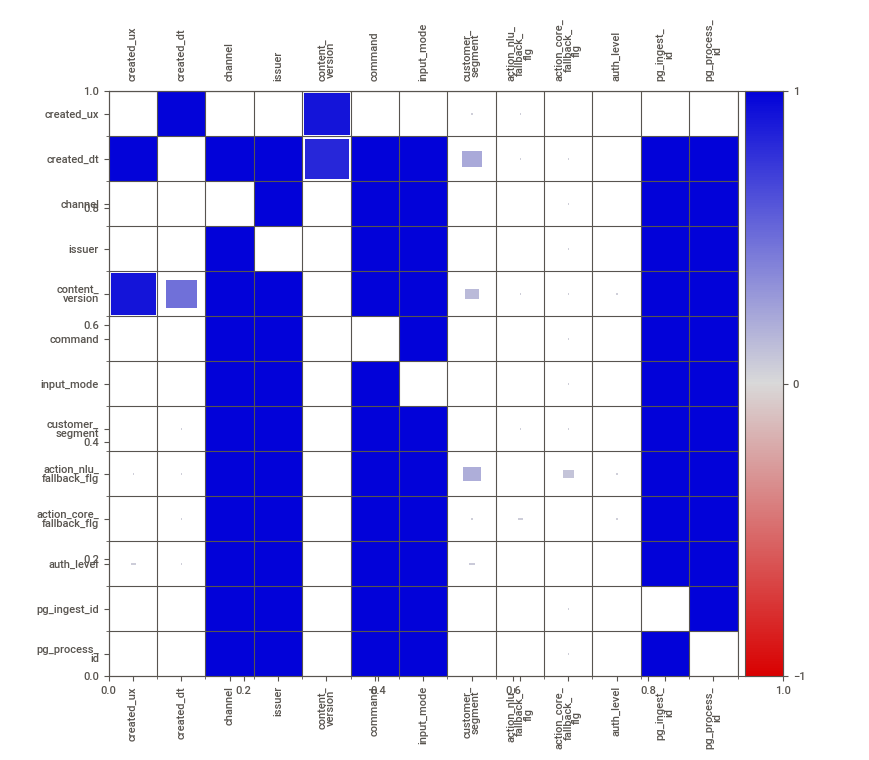
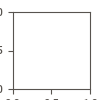

In [44]:
report.show_notebook()

In [45]:
report = sv.analyze(mar.fillna("NA"))
report.show_html(EDA_REPORT_PATHS["mar"], open_browser=False)

NameError: name 'mar' is not defined


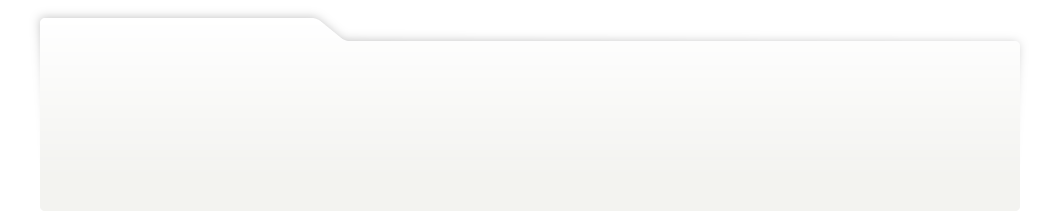
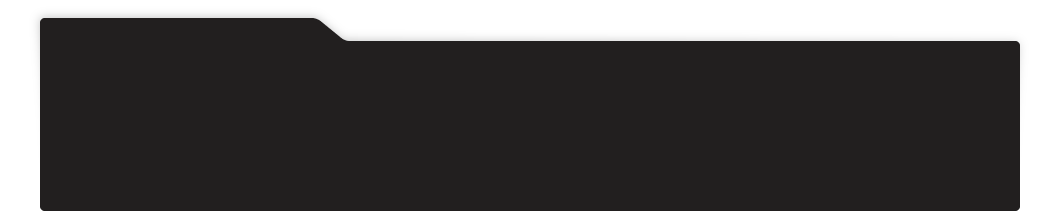
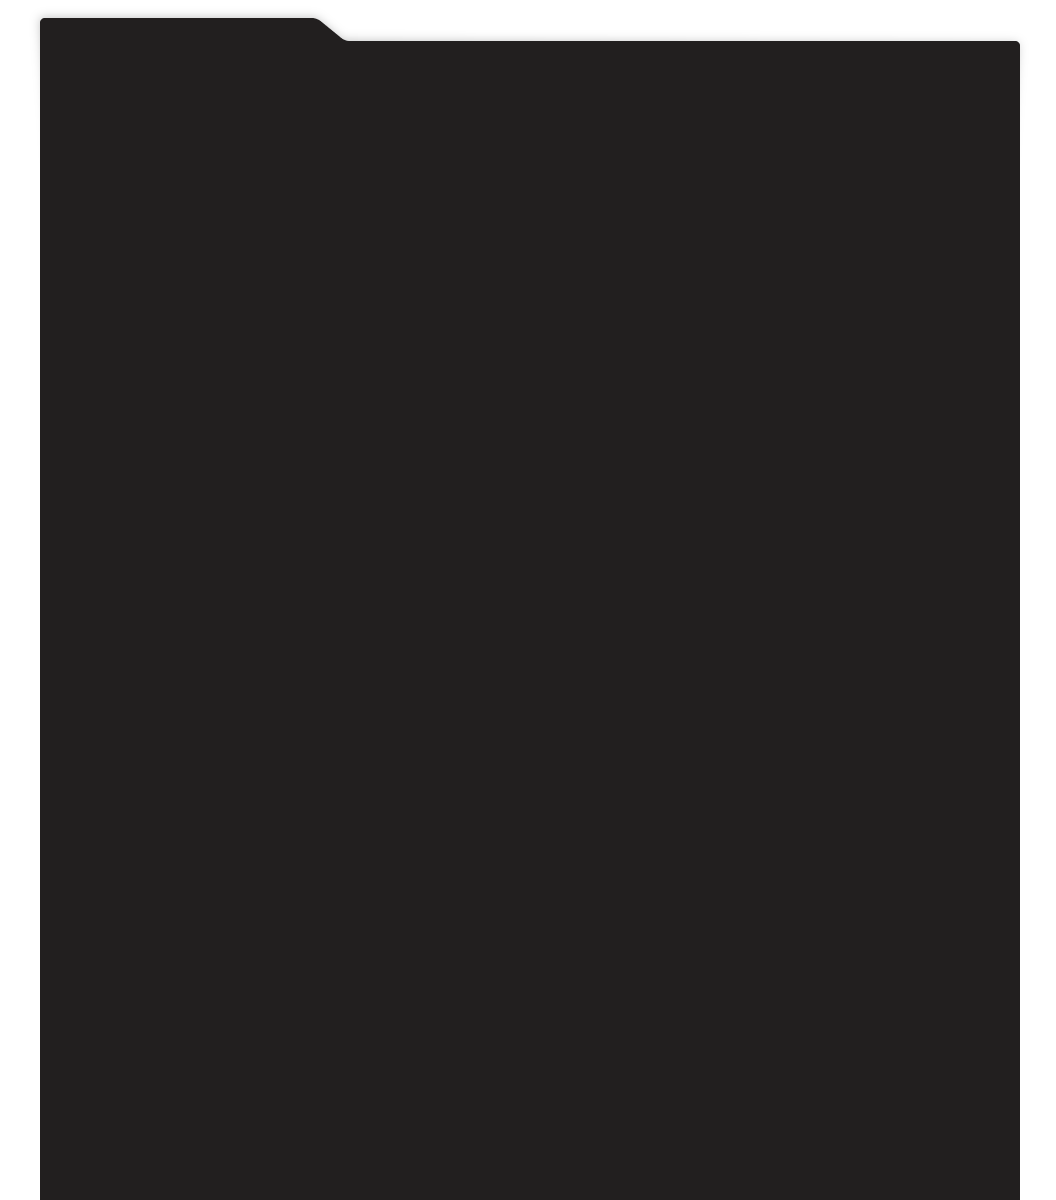
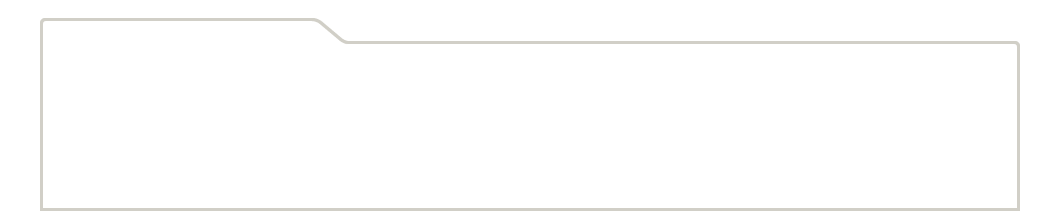
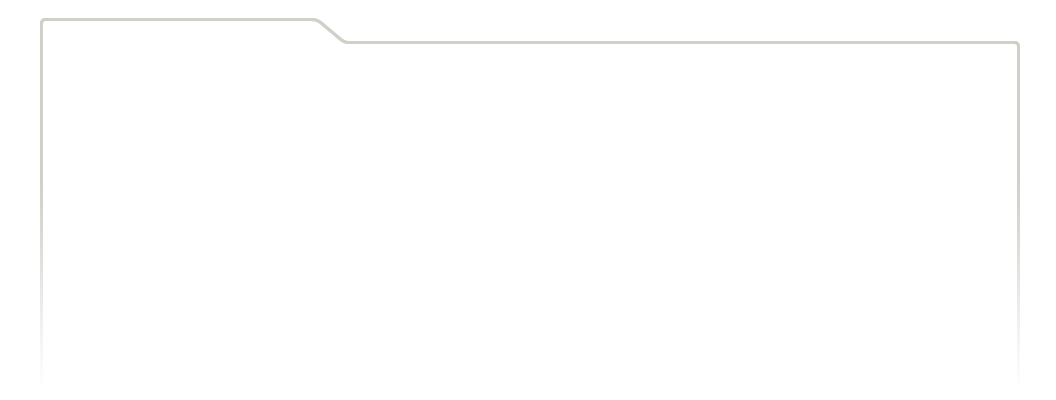
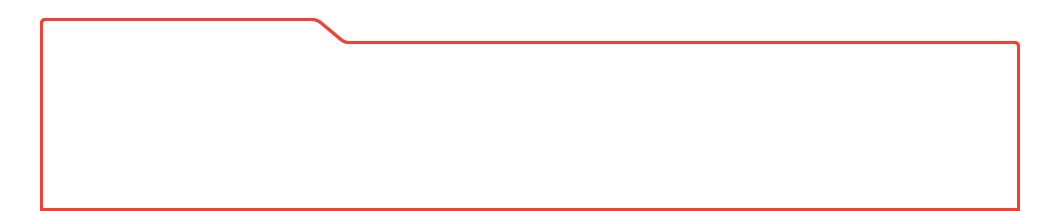
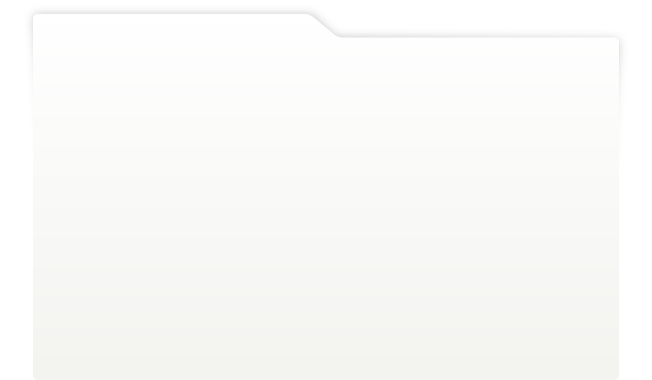
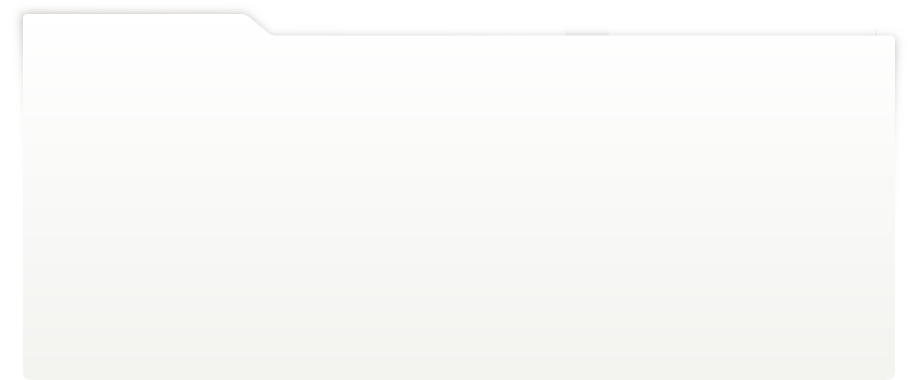
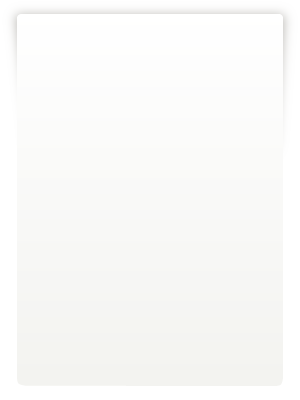
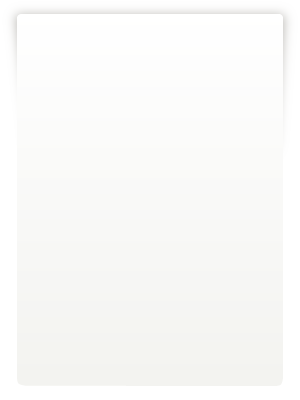
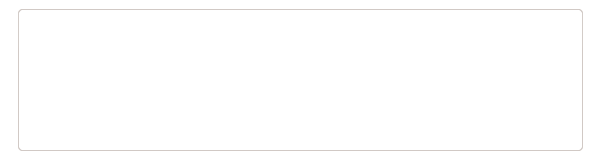
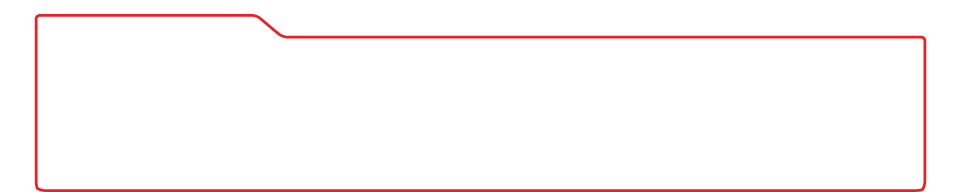
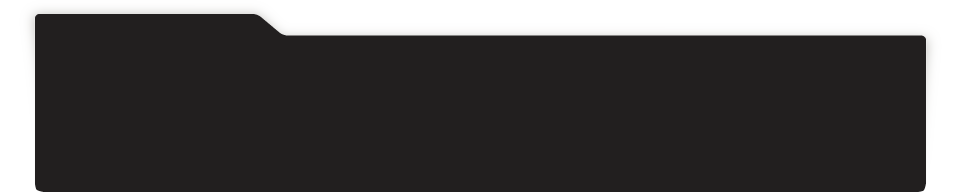
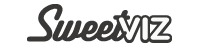
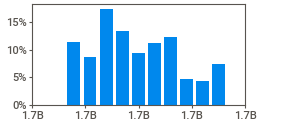
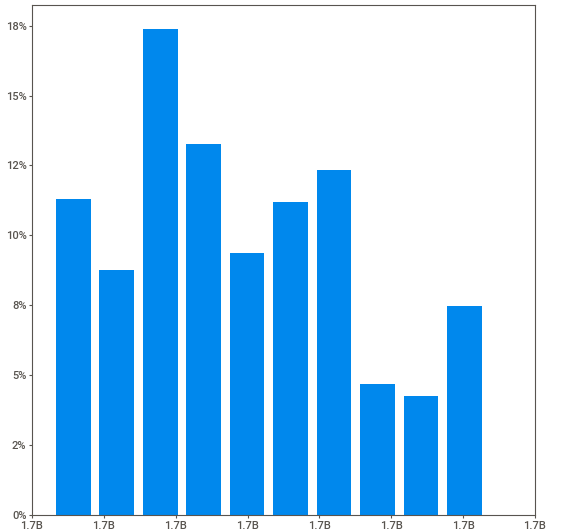
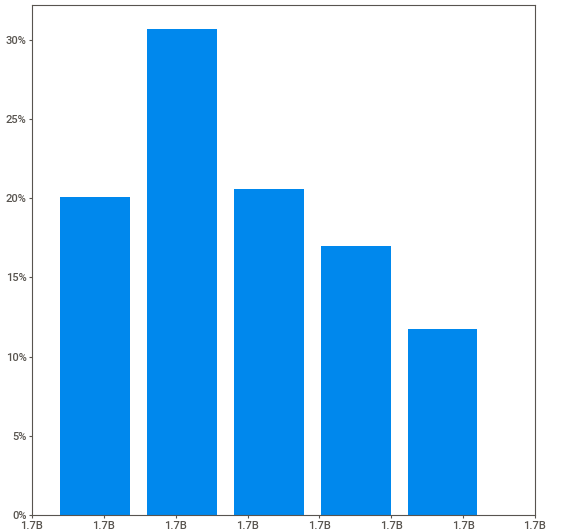
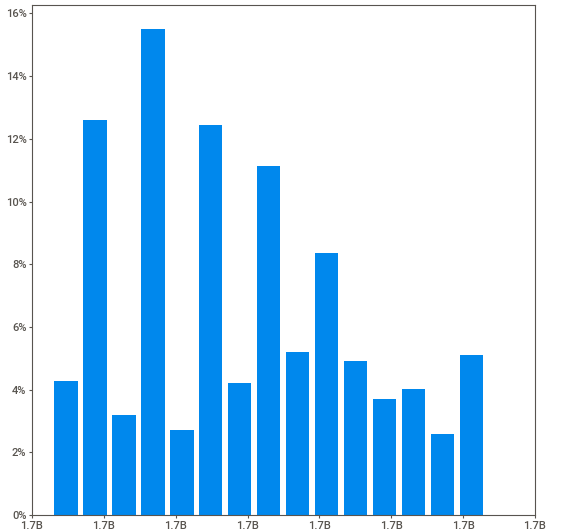
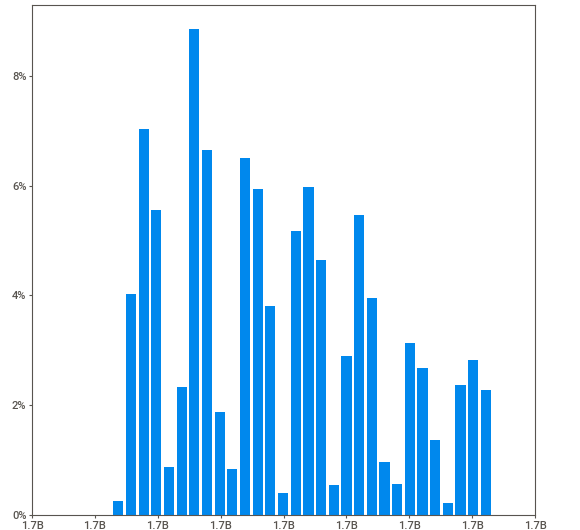
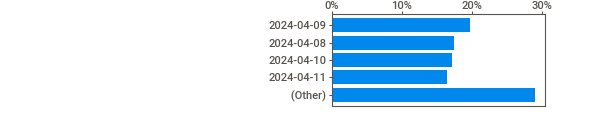
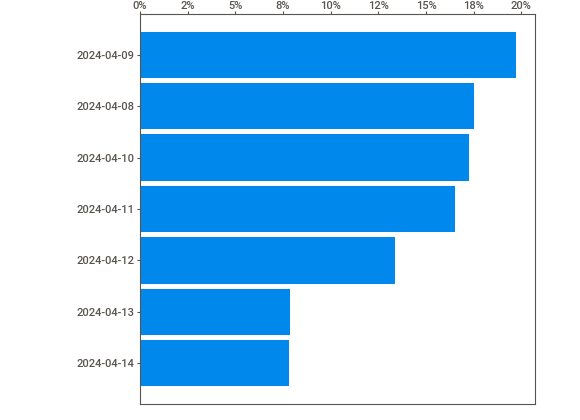
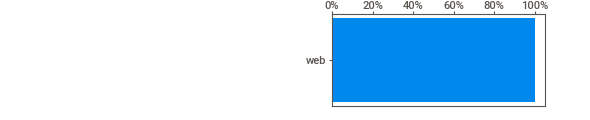
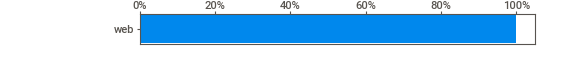
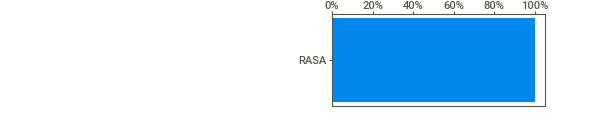
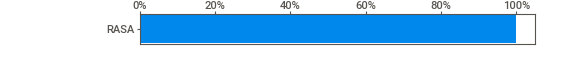
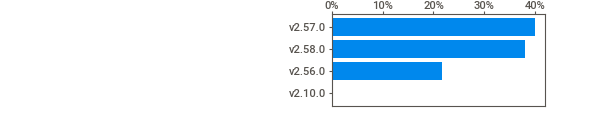
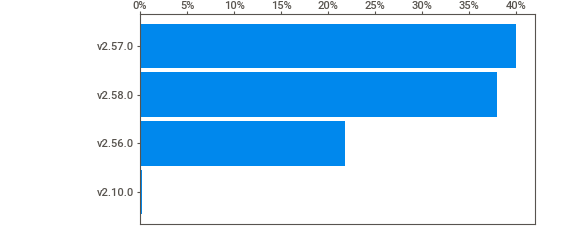
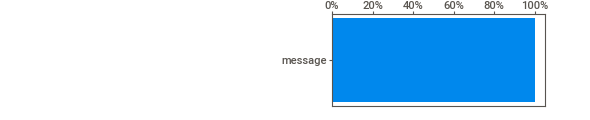
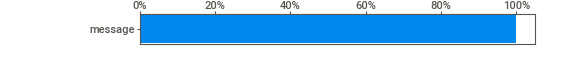
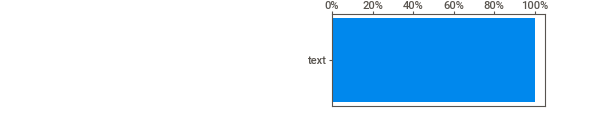
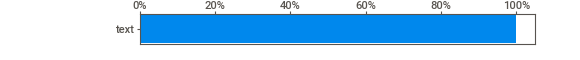
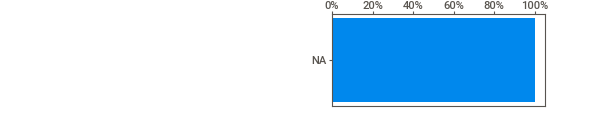
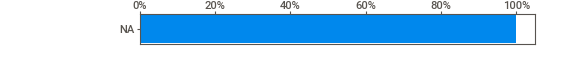
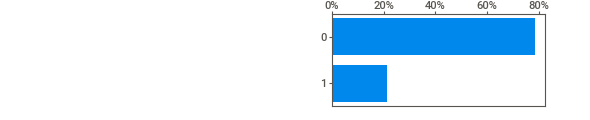
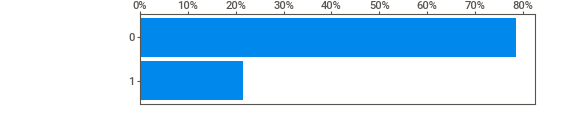
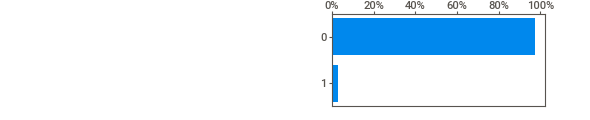
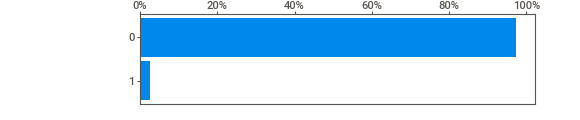
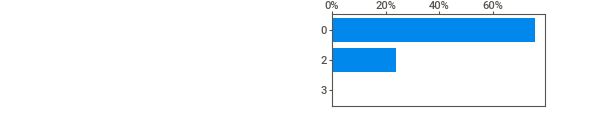
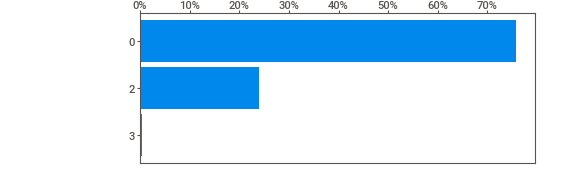
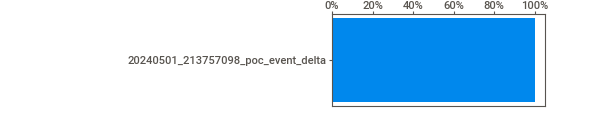
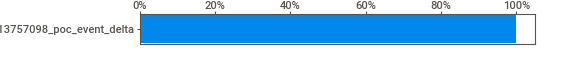
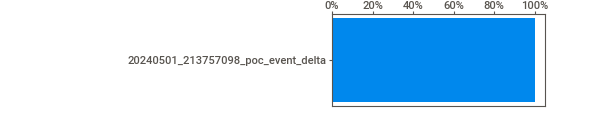
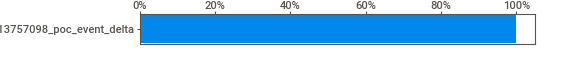
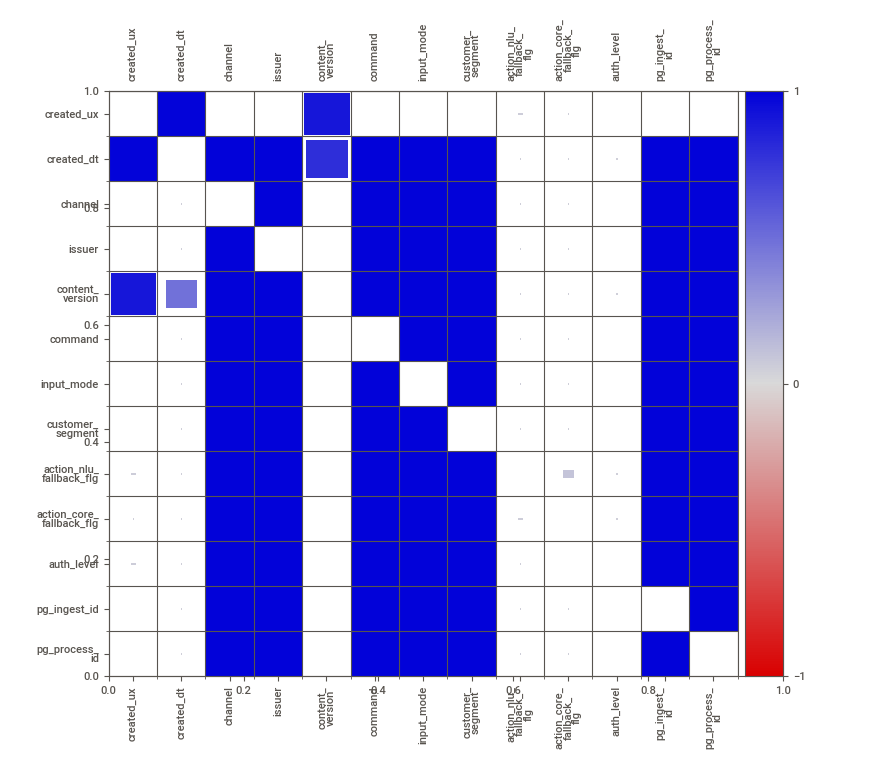
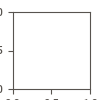

In [ ]:
report.show_notebook()

In [ ]:
report = sv.analyze(apr.fillna("NA"))
report.show_html(EDA_REPORT_PATHS["apr"], open_browser=False)

In [ ]:
report.show_notebook()

In [ ]:
report = sv.analyze(may.fillna("NA"))
report.show_html(EDA_REPORT_PATHS["may"], open_browser=False)

                                             |          | [  0%]   00:00 -> (? left)

Report ../reports/eda_may.html was generated.



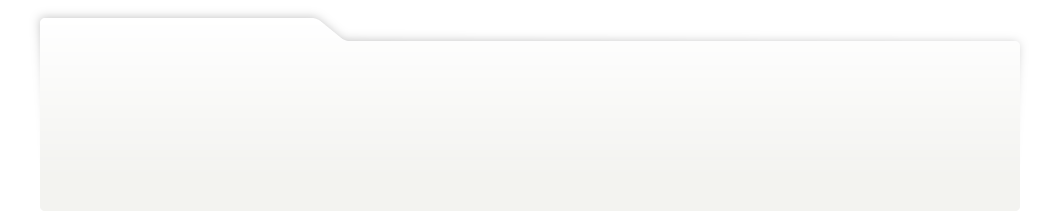
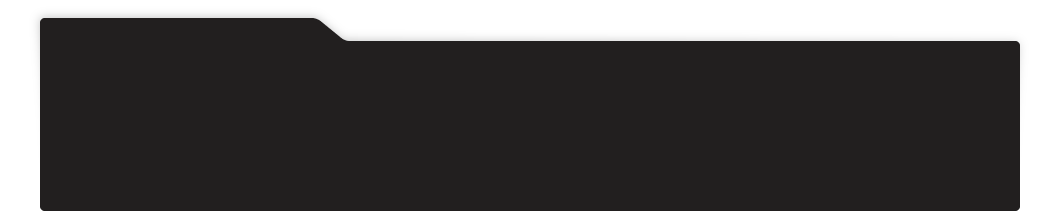
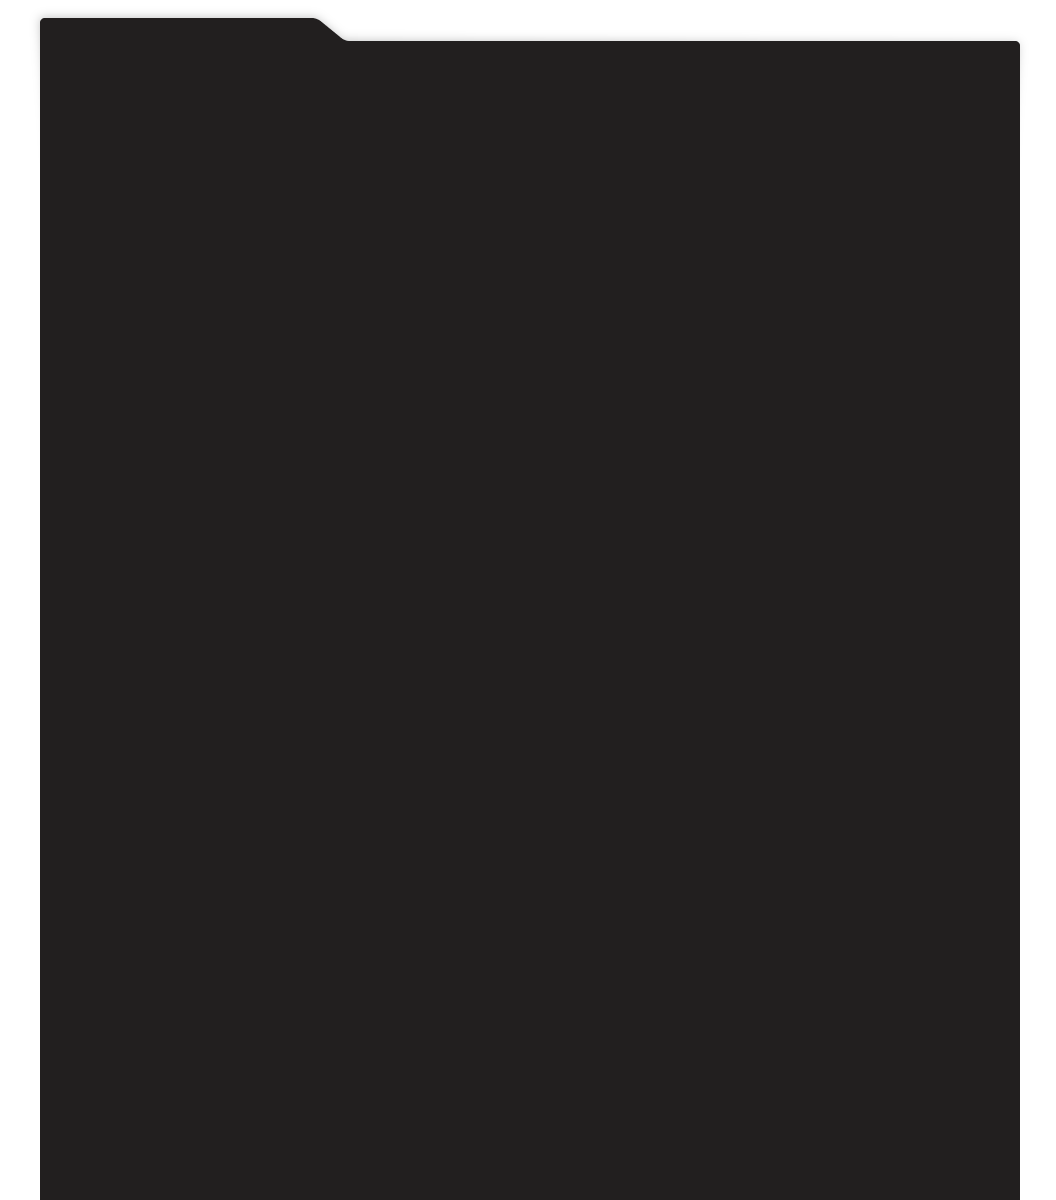
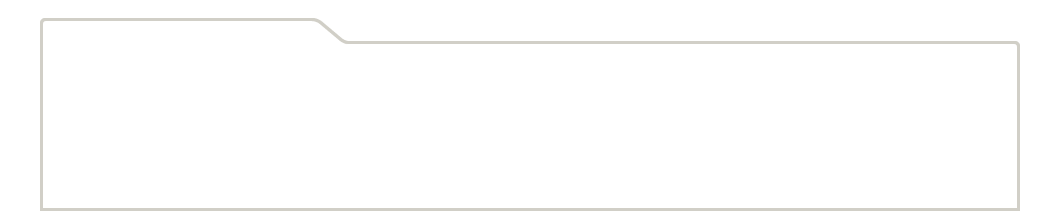
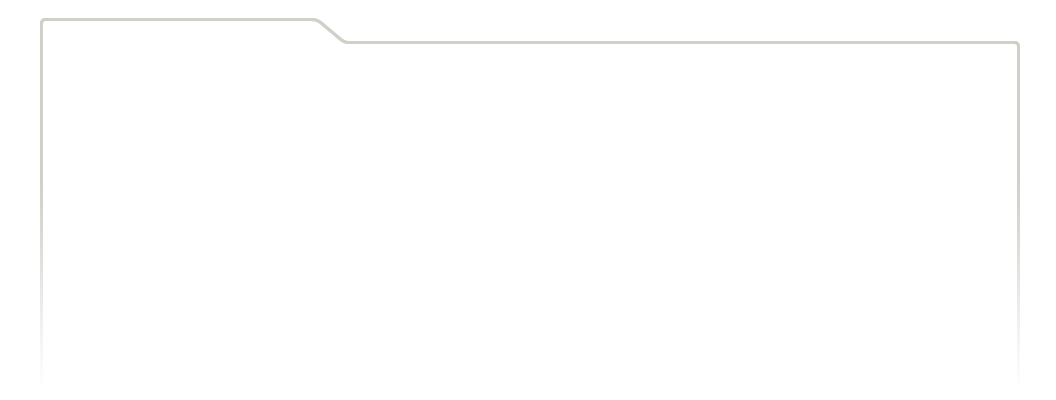
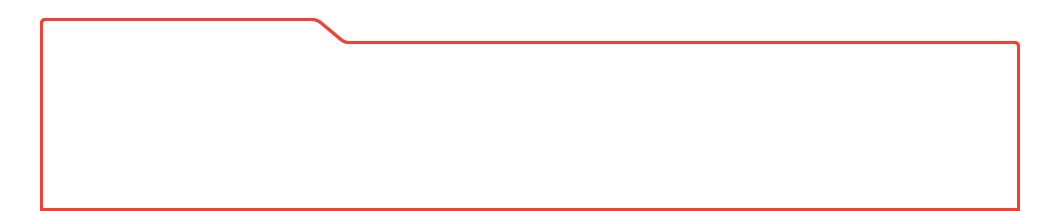
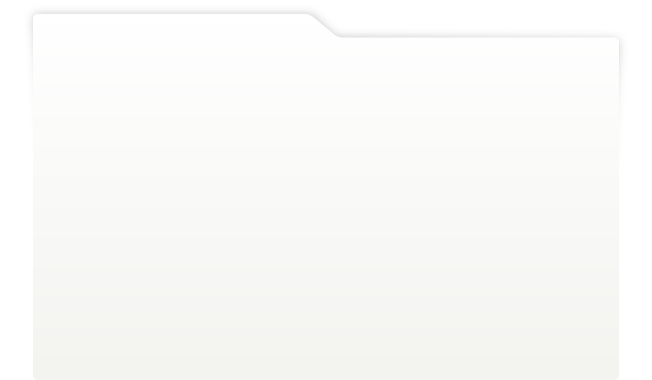
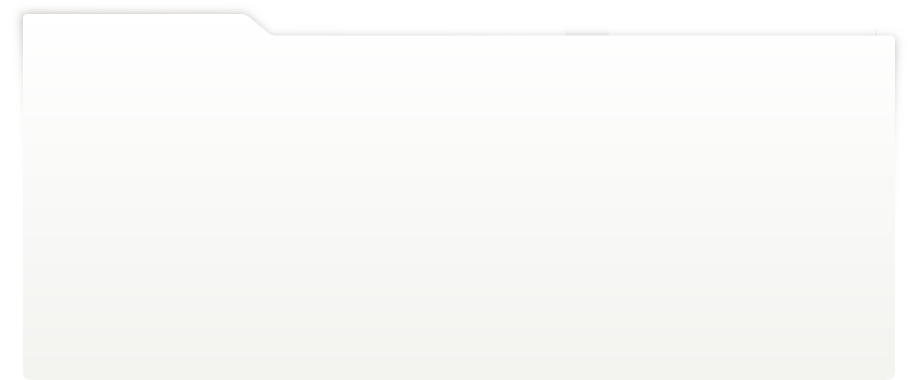
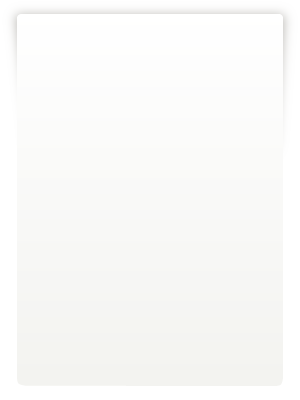
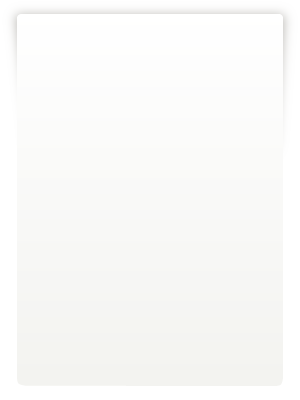
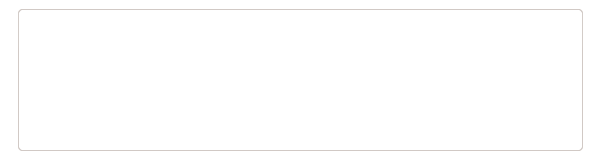
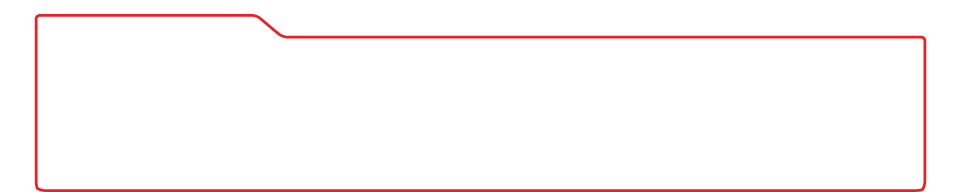
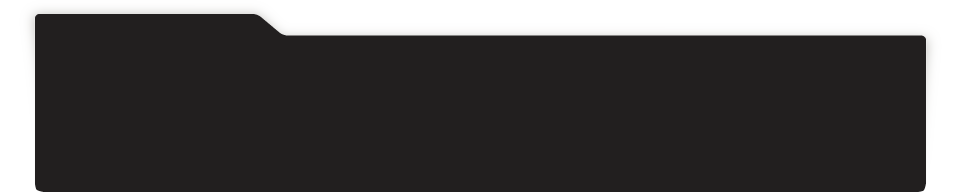
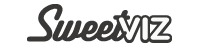
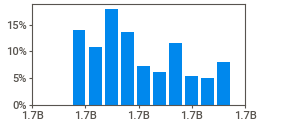
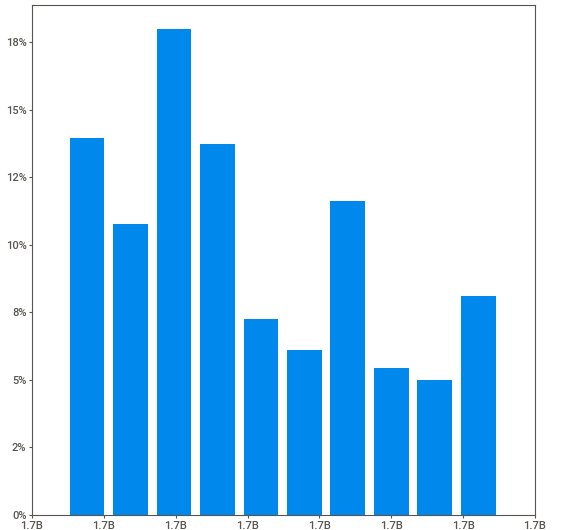
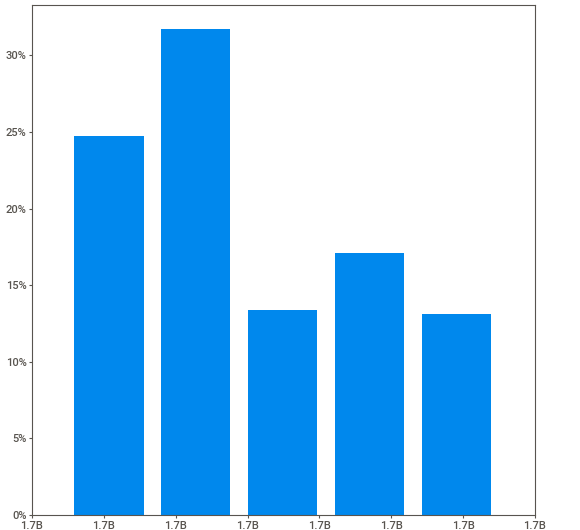
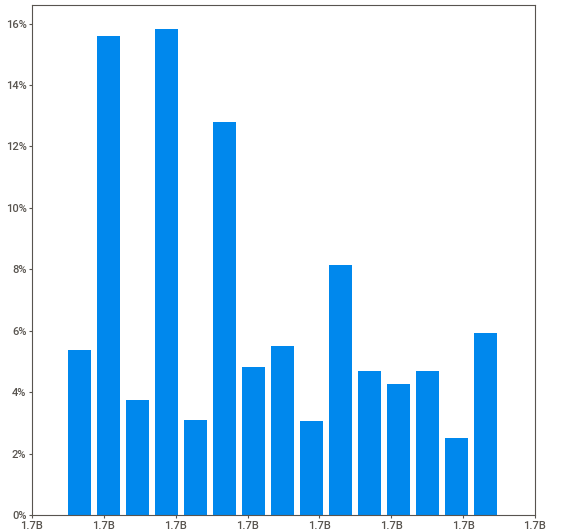
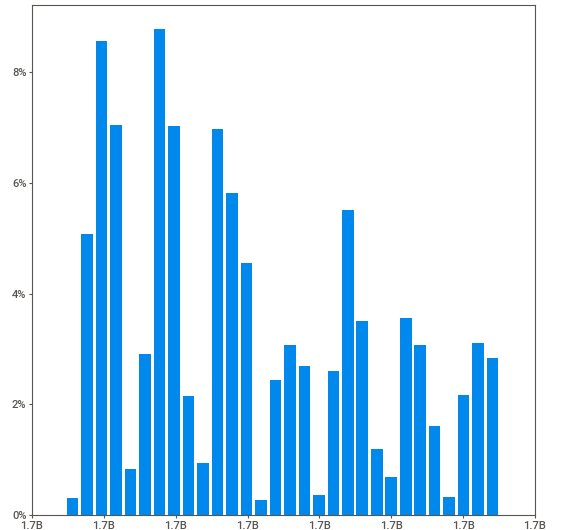
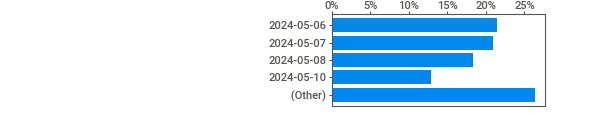
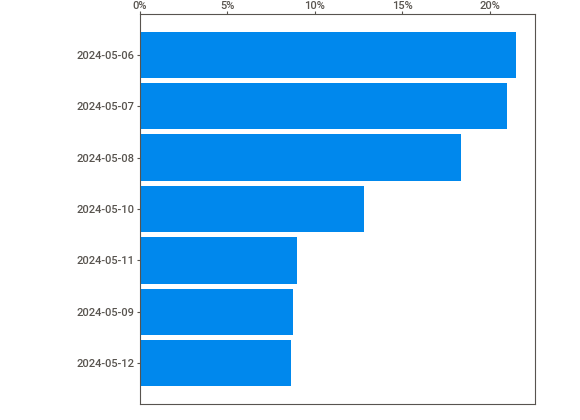
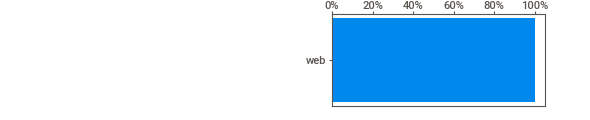
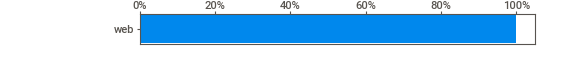
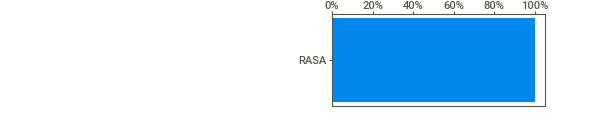
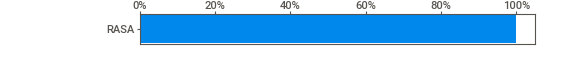
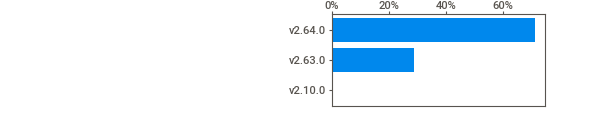
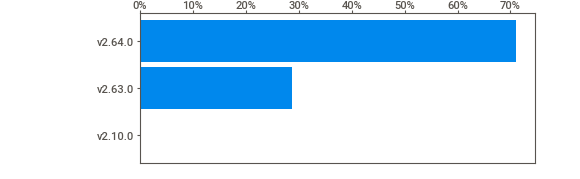
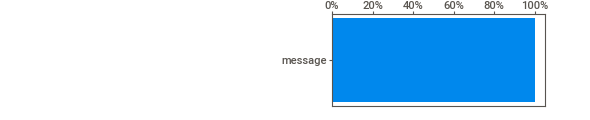
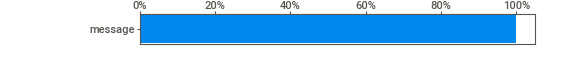
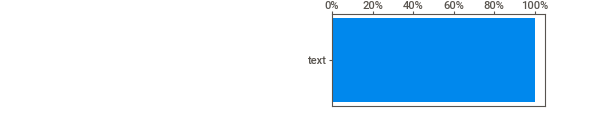
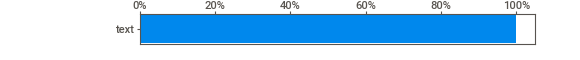
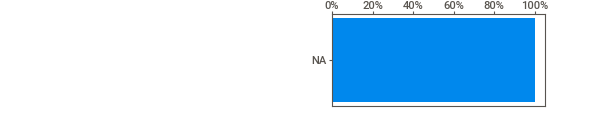
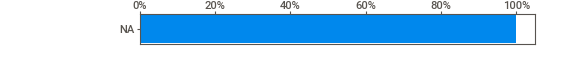
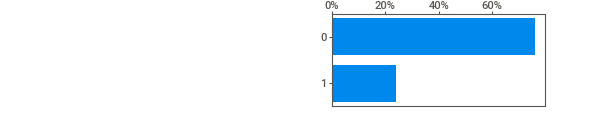
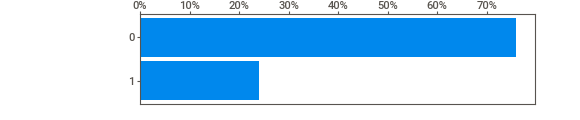
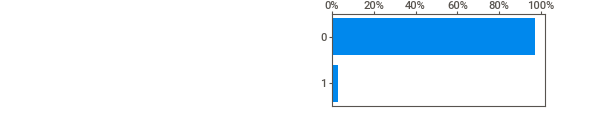
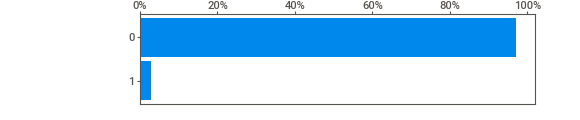
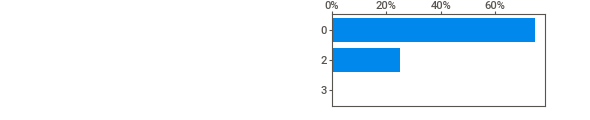
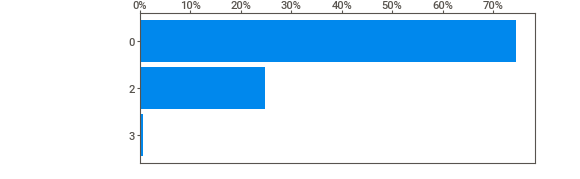
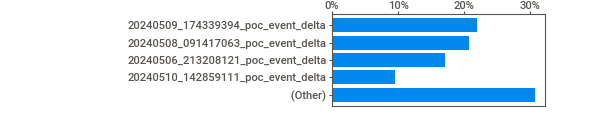
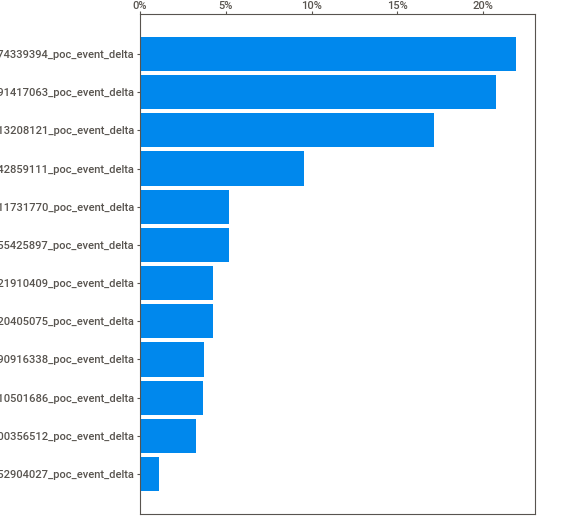
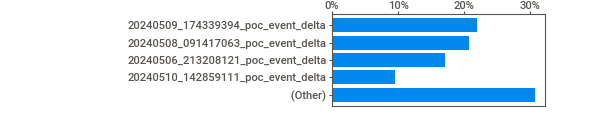
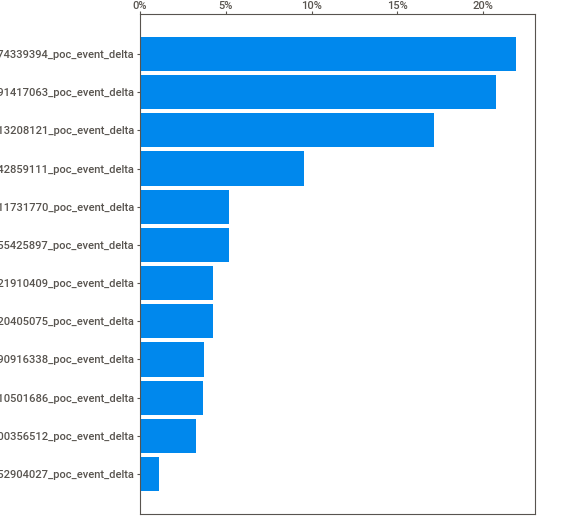
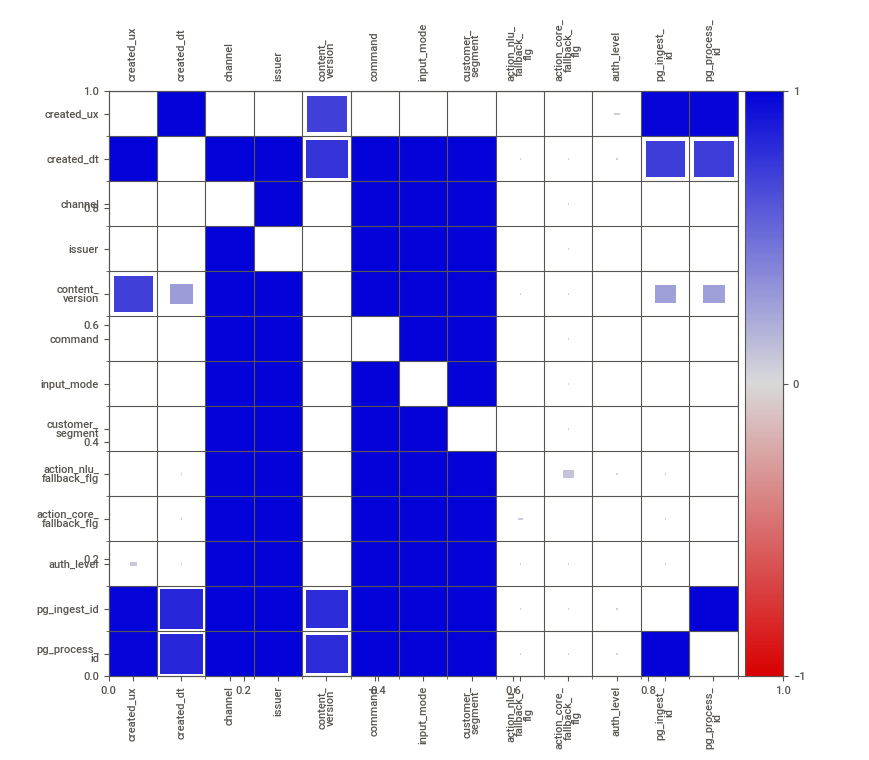
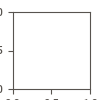

In [ ]:
report.show_notebook()

## rasa NLU data

embedings are supposed to be normalized, therefore 1st, 2nd, 3rd, 4th moments should be similar to normal distribution

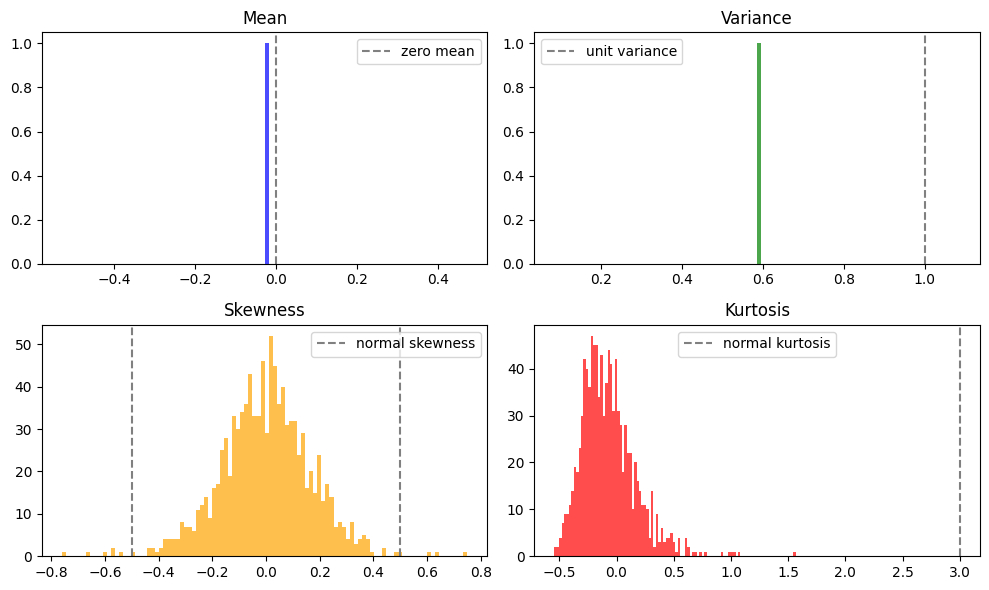

In [6]:
plot_moments_histogram(rasa_emb, figsize=(10,6), bins=100)